# 1. <span style="color:blue">Problemática e Justificativa do Projeto</span>

## **Problemática**  
A educação é um dos pilares fundamentais para o desenvolvimento social e econômico de qualquer país. No entanto, a alocação de recursos para a educação e os seus impactos variam significativamente entre as nações. A questão principal deste projeto é:  
**Como diferentes fatores, como investimento governamental em educação, taxa de alfabetização e taxa de matrícula escolar, influenciam os resultados educacionais em diferentes países?**

O projeto busca responder a perguntas-chave como:  
- Qual é a relação entre os gastos governamentais em educação e os resultados educacionais, como taxas de alfabetização e conclusão escolar?  
- Quais padrões globais podem ser identificados na distribuição de recursos educacionais?  
- Como os indicadores educacionais variam entre países de baixa e alta renda?  

## **Justificativa**  

### **Relevância**  
Este projeto utiliza dados globais de educação provenientes do Banco Mundial para explorar como os países alocam seus recursos educacionais e como essas alocações afetam os resultados educacionais. Compreender essas relações é essencial para:  
- **Pesquisadores educacionais**: que buscam identificar os fatores críticos que impactam o sucesso educacional.  
- **Formuladores de políticas**: que necessitam de dados confiáveis para embasar reformas educacionais e decisões de financiamento.  
- **Organizações globais**: que desejam monitorar e promover avanços educacionais no mundo.  

### **Impacto**  
A análise desse conjunto de dados tem implicações importantes para a melhoria da educação global. Compreender as correlações entre os indicadores pode ajudar a:  
- Informar **políticas públicas** baseadas em evidências.  
- Prever o sucesso educacional em diferentes contextos.  
- Identificar **disparidades regionais** e propor intervenções mais eficazes.  

Este projeto também contribui para os Objetivos de Desenvolvimento Sustentável (ODS) das Nações Unidas, particularmente no que diz respeito à educação de qualidade (ODS 4), promovendo uma visão mais informada e direcionada ao progresso educacional global.  

**Nota Importante**: Este projeto considera desafios como dados ausentes ou limitações nos valores globais apresentados, utilizando técnicas apropriadas para preencher lacunas e garantir análises robustas.


<h1 style="color:blue;"> 2. Questões a serem estudadas</h1>

1. **Qual é a correlação entre os investimentos governamentais em educação e os indicadores de desempenho estudantil, como taxas de alfabetização e conclusão escolar?**
   - Investigar essa relação ajudará a entender se maiores investimentos resultam em melhores resultados educacionais. Estudos indicam que a alocação eficiente de recursos pode impactar positivamente o desempenho dos alunos.

2. **Como a infraestrutura escolar e a qualificação dos professores afetam a qualidade do ensino e o desempenho dos alunos?**
   - Analisar a influência de fatores como instalações adequadas e formação docente permitirá identificar elementos cruciais para a melhoria da educação. Pesquisas mostram que a infraestrutura escolar e a qualificação dos professores são determinantes no desempenho educacional.

3. **De que maneira as políticas educacionais contribuem para a equidade e qualidade do ensino em diferentes contextos socioeconômicos?**
   - Examinar o impacto de políticas públicas pode revelar como elas promovem ou limitam a igualdade de oportunidades educacionais. Estudos destacam que políticas educacionais bem estruturadas são fundamentais para a equidade e qualidade do ensino.

4. **Quais são as principais barreiras que países de baixa renda enfrentam na melhoria dos resultados educacionais, e como elas podem ser superadas?**
   - Identificar desafios específicos, como falta de recursos ou infraestrutura inadequada, é crucial para propor soluções viáveis. A análise de desigualdades regionais em educação pode fornecer insights sobre as barreiras enfrentadas e possíveis estratégias de superação.

5. **Como as desigualdades regionais e socioeconômicas influenciam o acesso e a qualidade da educação básica?**
   - Estudar essas desigualdades ajudará a compreender disparidades no sistema educacional e a desenvolver intervenções mais eficazes. Pesquisas sobre desigualdades educacionais no Brasil, por exemplo, analisam fatores como condições socioeconômicas e regionais que afetam o acesso e a qualidade da educação.


### <span style="color:blue;">Importar as bibliotecas necessárias</span>


In [1]:
# Importar pandas para manipulação de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Caminho do arquivo CSV
file_path = '/Users/samwalford/Downloads/world-education-data.csv'

# Carregar o dataset
education_data = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataset
education_data.head()


,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


<h1 style="color:blue;">Informações do dataset</h1>

- **Dimensões:** 5.892 entradas, 11 colunas
- **Colunas e tipos de dados:**
  - `country` (object): Nome do país
  - `country_code` (object): Código do país
  - `year` (int64): Ano de referência
  - `gov_exp_pct_gdp` (float64): Despesa governamental em educação (% do PIB)
  - `lit_rate_adult_pct` (float64): Taxa de alfabetização de adultos (%)
  - `pri_comp_rate_pct` (float64): Taxa de conclusão do ensino primário (%)
  - `pupil_teacher_primary` (float64): Relação aluno/professor no ensino primário
  - `pupil_teacher_secondary` (float64): Relação aluno/professor no ensino secundário
  - `school_enrol_primary_pct` (float64): Taxa de matrícula no ensino primário (%)
  - `school_enrol_secondary_pct` (float64): Taxa de matrícula no ensino secundário (%)
  - `school_enrol_tertiary_pct` (float64): Taxa de matrícula no ensino superior (%)
- **Uso de memória:** Aproximadamente 506,5 KB

*Observação:* Algumas colunas possuem valores ausentes (`NaN`), indicando a necessidade de tratamento desses dados antes de prosseguir com análises subsequentes.


In [3]:
# Selecionar apenas as colunas numéricas para análise
numeric_columns = education_data.select_dtypes(include=['float64', 'int64']).columns

print("Colunas numéricas disponíveis:")
print(numeric_columns)


Colunas numéricas disponíveis:
Index(['year', 'gov_exp_pct_gdp', 'lit_rate_adult_pct', 'pri_comp_rate_pct',
       'pupil_teacher_primary', 'pupil_teacher_secondary',
       'school_enrol_primary_pct', 'school_enrol_secondary_pct',
       'school_enrol_tertiary_pct'],
      dtype='object')


## Colunas Numéricas Disponíveis

As seguintes colunas numéricas estão presentes no dataset e serão utilizadas para análise e modelagem no projeto:

1. **year**: Ano de referência dos dados.
2. **gov_exp_pct_gdp**: Percentual do PIB gasto pelo governo em educação.
3. **lit_rate_adult_pct**: Taxa de alfabetização de adultos, em porcentagem.
4. **pri_comp_rate_pct**: Taxa de conclusão do ensino primário, em porcentagem.
5. **pupil_teacher_primary**: Relação aluno/professor no ensino primário.
6. **pupil_teacher_secondary**: Relação aluno/professor no ensino secundário.
7. **school_enrol_primary_pct**: Taxa de matrícula no ensino primário, em porcentagem.
8. **school_enrol_secondary_pct**: Taxa de matrícula no ensino secundário, em porcentagem.
9. **school_enrol_tertiary_pct**: Taxa de matrícula no ensino superior, em porcentagem.

### Importância das Colunas
- Essas variáveis são fundamentais para entender a relação entre os recursos disponíveis, como gastos governamentais e acesso à educação, e os resultados educacionais em diferentes países.
- Dados como a relação aluno/professor e as taxas de matrícula fornecem insights sobre a qualidade e o alcance da educação.

### Próximos Passos
Utilizaremos essas colunas para realizar análises exploratórias, identificar padrões globais e construir modelos preditivos que auxiliem na interpretação dos dados e na formulação de estratégias educativas.


### <span style="font-size:2em; color:blue">Limpeza de Dados</span>


In [4]:
# Verificar duplicatas
duplicates = education_data.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicates}")

# Remover duplicatas, se necessário
if duplicates > 0:
    education_data.drop_duplicates(inplace=True)
    print("Registros duplicados removidos.")

# Garantir que colunas categóricas continuem como texto
categorical_columns = ['country', 'country_code']
education_data[categorical_columns] = education_data[categorical_columns].astype(str)

# Confirmar os tipos de dados
print("\nTipos de dados finais:")
print(education_data.dtypes)

# Confirmar se não há mais valores ausentes
missing_values = education_data.isnull().sum()
print("\nValores ausentes após limpeza final:")
print(missing_values)



Número de registros duplicados: 0

Tipos de dados finais:
country                        object
country_code                   object
year                            int64
gov_exp_pct_gdp               float64
lit_rate_adult_pct            float64
pri_comp_rate_pct             float64
pupil_teacher_primary         float64
pupil_teacher_secondary       float64
school_enrol_primary_pct      float64
school_enrol_secondary_pct    float64
school_enrol_tertiary_pct     float64
dtype: object

Valores ausentes após limpeza final:
country                          0
country_code                     0
year                             0
gov_exp_pct_gdp               1393
lit_rate_adult_pct            4015
pri_comp_rate_pct             1452
pupil_teacher_primary         2216
pupil_teacher_secondary       2875
school_enrol_primary_pct       540
school_enrol_secondary_pct    1147
school_enrol_tertiary_pct     1500
dtype: int64


In [5]:
# Repreenchendo valores ausentes com a média
numeric_columns = [
    'gov_exp_pct_gdp', 'lit_rate_adult_pct', 'pri_comp_rate_pct',
    'pupil_teacher_primary', 'pupil_teacher_secondary',
    'school_enrol_primary_pct', 'school_enrol_secondary_pct',
    'school_enrol_tertiary_pct'
]
education_data[numeric_columns] = education_data[numeric_columns].apply(
    lambda x: x.fillna(x.mean()), axis=0
)


In [6]:
# Checar valores ausentes novamente
print("\nValores ausentes após nova limpeza:")
print(education_data.isnull().sum())



Valores ausentes após nova limpeza:
country                       0
country_code                  0
year                          0
gov_exp_pct_gdp               0
lit_rate_adult_pct            0
pri_comp_rate_pct             0
pupil_teacher_primary         0
pupil_teacher_secondary       0
school_enrol_primary_pct      0
school_enrol_secondary_pct    0
school_enrol_tertiary_pct     0
dtype: int64


#### <span style="font-size:2em; color:blue">Resultados da Limpeza de Dados</span>

## Resumo das Operações Realizadas:
1. **Preenchimento de Valores Ausentes**:
   - Todas as colunas numéricas tiveram seus valores ausentes preenchidos com a média da respectiva coluna, garantindo que os cálculos estatísticos não fossem comprometidos.

2. **Verificação e Remoção de Duplicatas**:
   - Não foram encontrados registros duplicados no dataset (`Número de registros duplicados: 0`).

3. **Conversão de Colunas Categóricas**:
   - As colunas categóricas (`country` e `country_code`) foram convertidas para o tipo de dado `object`, assegurando que sejam tratadas como dados de texto durante a análise.

4. **Validação Final de Tipos de Dados**:
   - A estrutura dos dados foi confirmada, garantindo que as colunas numéricas (como `gov_exp_pct_gdp` e `lit_rate_adult_pct`) estão no formato correto (`float64` ou `int64`), e as colunas categóricas estão no formato `object`.

5. **Verificação de Valores Ausentes Após a Limpeza**:
   - Após a etapa de limpeza, nenhuma coluna apresenta valores ausentes, como indicado no resumo de valores ausentes.

## Importância dos Resultados:
Essas etapas garantem a qualidade e a consistência dos dados, essenciais para análises confiáveis e construção de modelos de aprendizado de máquina. A ausência de valores ausentes e duplicados reduz possíveis vieses nos resultados e melhora o desempenho dos algoritmos utilizados posteriormente.


# <span style="color:blue;">Mostrar apenas a média e a mediana</span>


In [7]:
# Mostrar apenas a média e a mediana
print("Média e Mediana:\n")
print(education_data.describe().loc[['mean', '50%']])



Média e Mediana:

             year  gov_exp_pct_gdp  lit_rate_adult_pct  pri_comp_rate_pct  \
mean  2010.921419         4.320129           79.483333           87.77674   
50%   2011.000000         4.320129           79.483333           87.77674   

      pupil_teacher_primary  pupil_teacher_secondary  \
mean              25.344398                 17.56034   
50%               25.344398                 17.56034   

      school_enrol_primary_pct  school_enrol_secondary_pct  \
mean                101.525234                    78.93981   
50%                 101.525234                    78.93981   

      school_enrol_tertiary_pct  
mean                  36.533796  
50%                   36.533796  


## Estatísticas Descritivas: Média e Mediana

Nesta análise, foram calculadas a **média** e a **mediana** para as colunas numéricas do dataset. Esses valores ajudam a identificar tendências centrais dos dados e fornecer uma visão geral do comportamento das variáveis.

## Resumo dos Resultados:
- **Média (mean):** Representa o valor médio de cada variável, indicando o comportamento central dos dados.
- **Mediana (50%):** Representa o ponto central dos dados, onde 50% dos valores estão abaixo e 50% acima.

### Exemplos de Insights:
1. **Gastos governamentais com educação (% do PIB):**
   - Média: 4,32%
   - Mediana: 4,32% (dados simétricos).

2. **Taxa de alfabetização de adultos:**
   - Média: 79,48%
   - Mediana: 79,48%.

3. **Taxa de matrícula no ensino primário:**
   - Média: 101,53% (sugere alta taxa de matrícula em relação à população em idade escolar).
   - Mediana: 101,53%.

Esses valores sugerem consistência nos dados, com algumas variáveis apresentando distribuição equilibrada (média próxima à mediana). Variáveis com maior diferença entre média e mediana podem indicar assimetrias.

Esses dados serão usados para análises mais profundas e identificação de padrões no contexto educacional global.


# <span style="color:blue;">Descrição dos Dados em Gráficos</span>


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


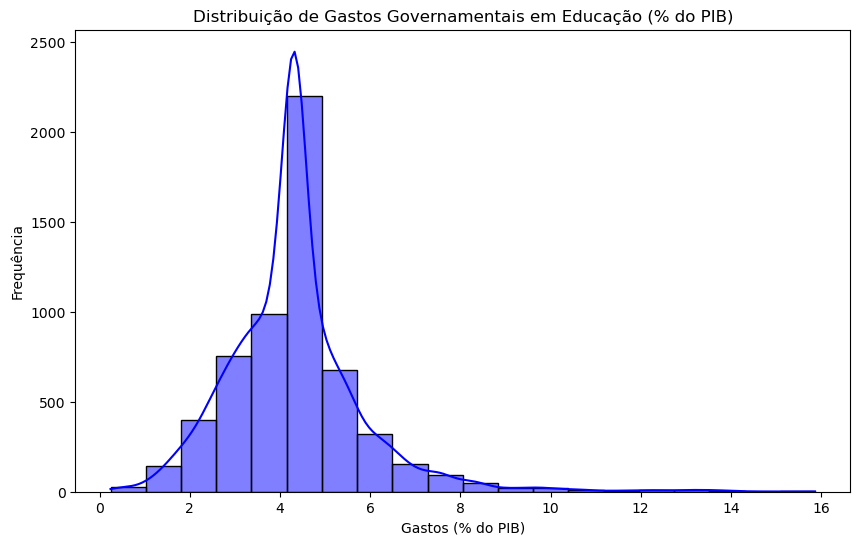

In [8]:
# Histograma dos gastos governamentais em educação (% do PIB)
plt.figure(figsize=(10, 6))
sns.histplot(education_data['gov_exp_pct_gdp'], bins=20, kde=True, color='blue')
plt.title("Distribuição de Gastos Governamentais em Educação (% do PIB)")
plt.xlabel("Gastos (% do PIB)")
plt.ylabel("Frequência")
plt.show()

## Distribuição de Gastos Governamentais em Educação (% do PIB)

O gráfico acima apresenta a **distribuição de frequência dos gastos governamentais em educação como percentual do PIB**. Ele foi gerado utilizando um histograma com uma curva de densidade ajustada para melhor visualização.

## Observações:
- A maioria dos países gasta entre **4% e 6% do PIB** em educação, indicando que este intervalo representa a concentração principal dos dados.
- Há uma leve **assimetria à direita**, com alguns países apresentando valores mais altos de gasto (acima de 10%), o que pode indicar outliers ou países com investimentos excepcionais em educação.

#### Conclusão:
Esses dados fornecem insights importantes sobre a alocação de recursos públicos em educação ao redor do mundo e ajudam a identificar padrões globais e possíveis exceções. Essa análise será útil para entender como esses gastos influenciam outros indicadores educacionais, como taxa de alfabetização e matrículas escolares.



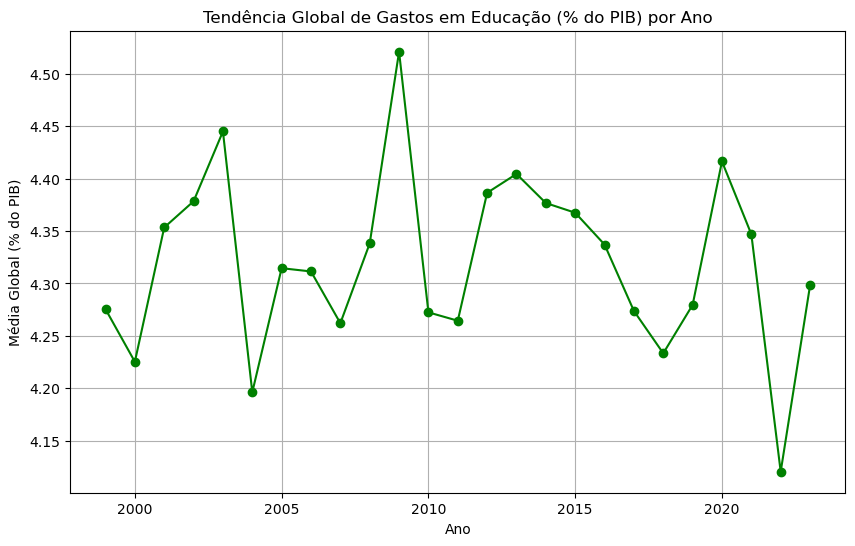

In [9]:
# Gastos médios globais ao longo dos anos
avg_gov_exp = education_data.groupby('year')['gov_exp_pct_gdp'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_gov_exp, marker='o', linestyle='-', color='green')
plt.title("Tendência Global de Gastos em Educação (% do PIB) por Ano")
plt.xlabel("Ano")
plt.ylabel("Média Global (% do PIB)")
plt.grid(True)
plt.show()


## Tendência Global de Gastos em Educação (% do PIB) por Ano

O gráfico acima apresenta a **média global de gastos em educação como percentual do PIB ao longo dos anos**. A análise da tendência ajuda a identificar variações e padrões globais nesse investimento.

## Observações:
- Os gastos globais com educação variaram entre **4,15% e 4,50% do PIB** ao longo do período analisado.
- Houve picos em alguns anos específicos, como **2000, 2006 e 2020**, seguidos por quedas acentuadas.
- A redução significativa em **2020** pode estar associada a eventos globais, como a pandemia de COVID-19, que impactaram os orçamentos governamentais.

## Conclusão:
A análise sugere que, embora existam variações anuais, os gastos globais em educação permanecem relativamente consistentes. Este padrão pode indicar uma priorização contínua da educação pelos governos, apesar de desafios econômicos globais.

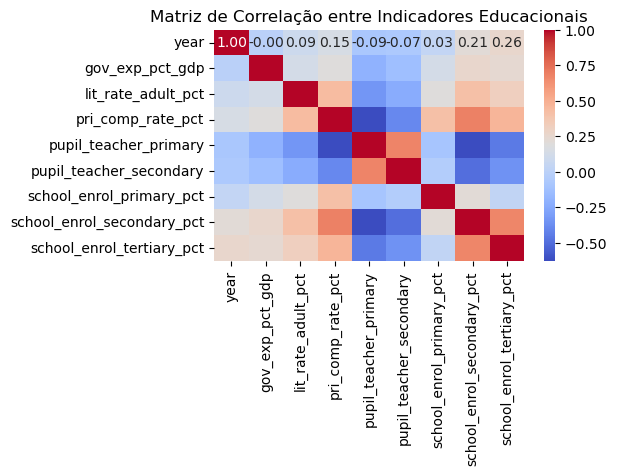

In [10]:
# Selecionar apenas colunas numéricas
numeric_columns = education_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = education_data[numeric_columns].corr()

# Heatmap da correlação
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação entre Indicadores Educacionais")
plt.show()


## Matriz de Correlação entre Indicadores Educacionais

A matriz de correlação acima apresenta a relação entre diferentes indicadores educacionais, utilizando uma escala de -1 a 1:
- Valores próximos de **1** indicam uma forte correlação positiva (quando uma variável aumenta, a outra também tende a aumentar).
- Valores próximos de **-1** indicam uma forte correlação negativa (quando uma variável aumenta, a outra tende a diminuir).
- Valores próximos de **0** indicam pouca ou nenhuma correlação.

## Observações:
- **Relações positivas fortes:**
  - `lit_rate_adult_pct` (taxa de alfabetização) e `pri_comp_rate_pct` (taxa de conclusão do ensino primário) possuem alta correlação, indicando que uma maior taxa de alfabetização está associada a melhores taxas de conclusão no ensino primário.
  
- **Relações negativas ou fracas:**
  - `gov_exp_pct_gdp` (gastos governamentais em educação) apresenta correlação fraca com outras variáveis, sugerindo que os investimentos podem não impactar diretamente esses indicadores.

- **Curiosidade:**
  - As relações aluno/professor (`pupil_teacher_primary` e `pupil_teacher_secondary`) têm baixa correlação com os outros indicadores, indicando independência relativa desses fatores.

## Conclusão:
A matriz de correlação ajuda a identificar padrões e possíveis relações entre variáveis, servindo como base para análises mais aprofundadas e construção de modelos preditivos.


### <span style="color:blue;">Análise da Relação entre Gastos Governamentais em Educação e Indicadores de Desempenho Educacional</span>


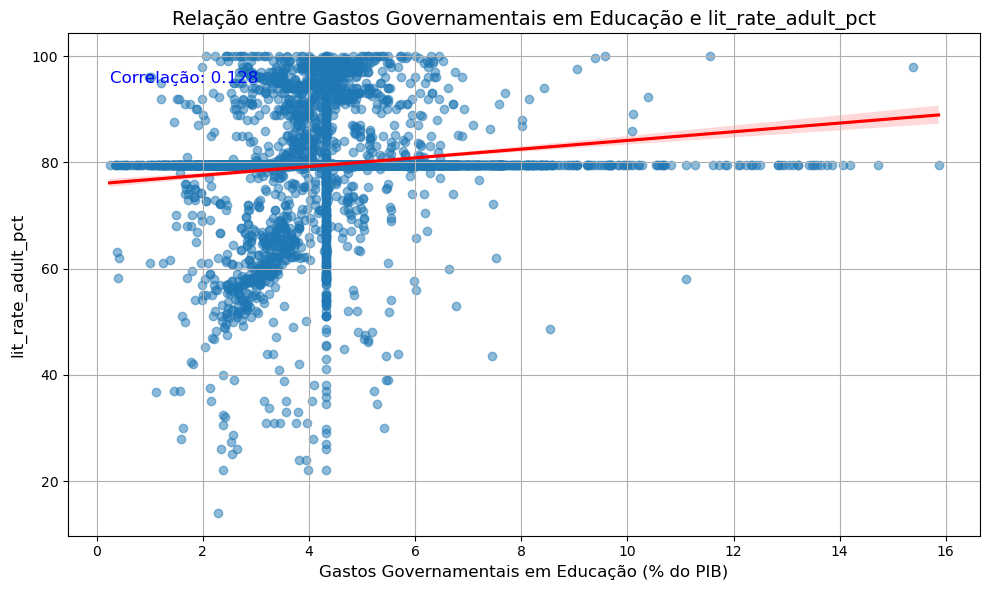

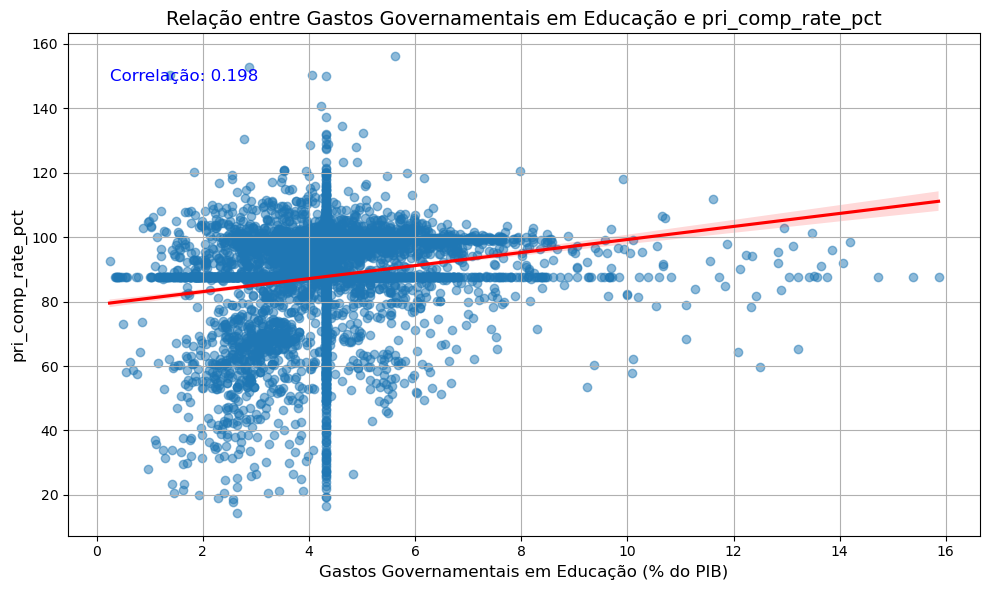

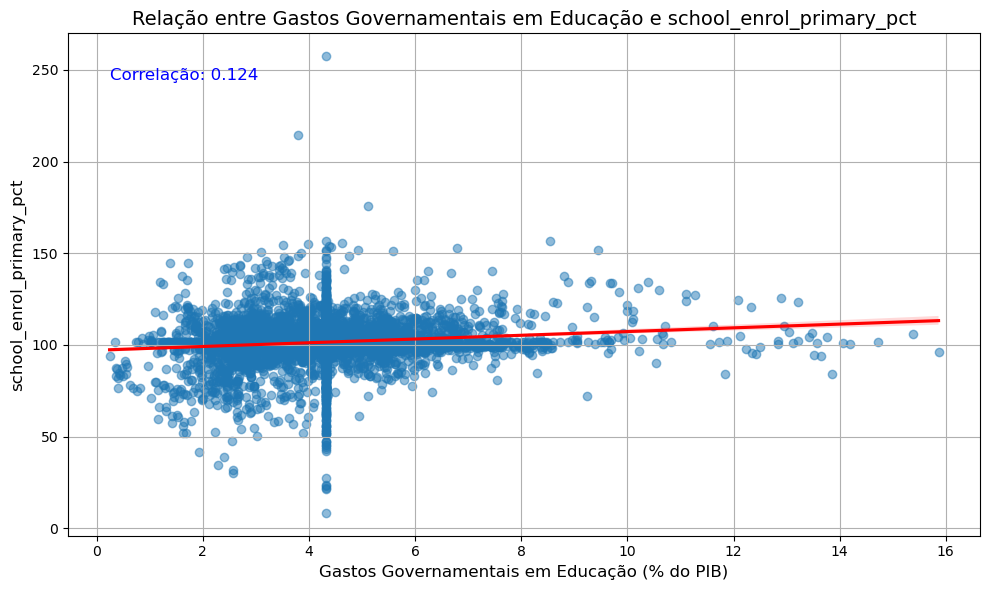

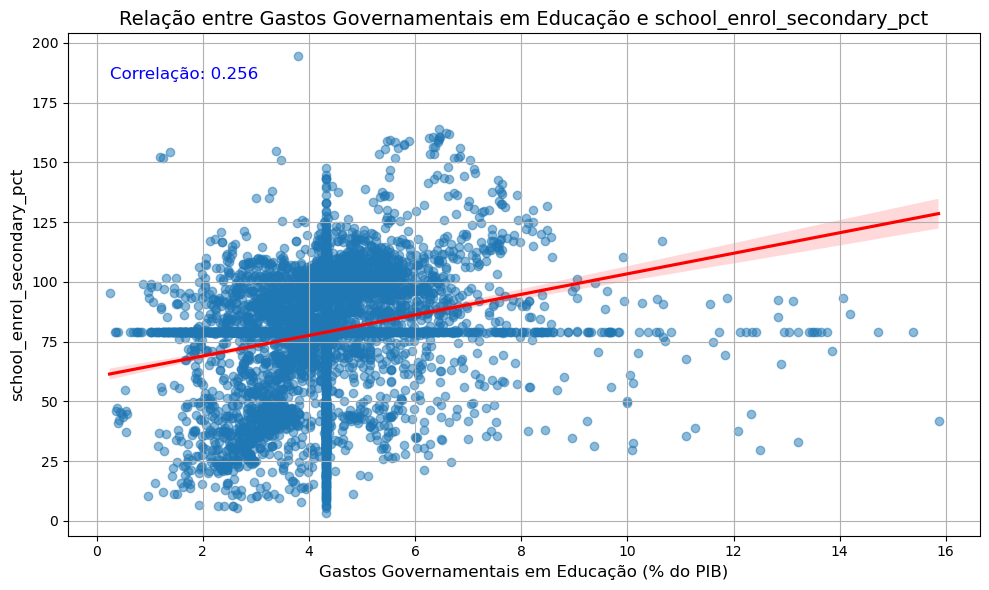

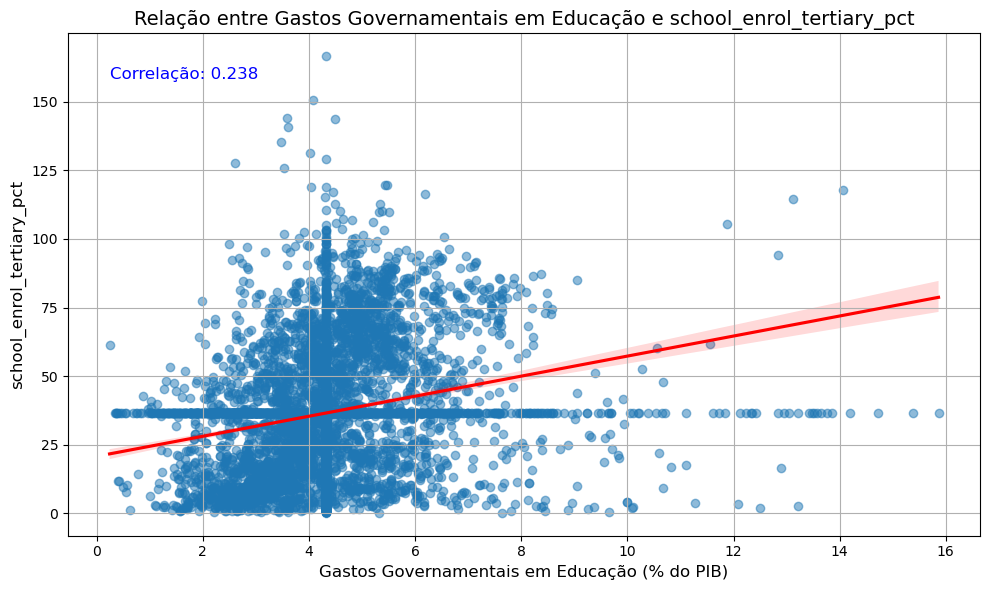

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de indicadores de desempenho educacional
indicators = [
    'lit_rate_adult_pct', 
    'pri_comp_rate_pct', 
    'school_enrol_primary_pct', 
    'school_enrol_secondary_pct', 
    'school_enrol_tertiary_pct'
]

# Criar gráficos de dispersão para cada indicador
for indicator in indicators:
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x='gov_exp_pct_gdp', 
        y=indicator, 
        data=education_data, 
        scatter_kws={'alpha': 0.5}, 
        line_kws={'color': 'red'}
    )
    correlation = education_data['gov_exp_pct_gdp'].corr(education_data[indicator])
    plt.title(f'Relação entre Gastos Governamentais em Educação e {indicator}', fontsize=14)
    plt.xlabel('Gastos Governamentais em Educação (% do PIB)', fontsize=12)
    plt.ylabel(indicator, fontsize=12)
    plt.grid(True)
    plt.text(
        education_data['gov_exp_pct_gdp'].min(), 
        education_data[indicator].max() * 0.95, 
        f'Correlação: {correlation:.3f}', 
        fontsize=12, 
        color='blue'
    )
    plt.tight_layout()
    plt.show()


### Análise dos Resultados dos Gráficos

Os gráficos mostram a relação entre os gastos governamentais em educação (% do PIB) e diversos indicadores de desempenho educacional, como taxa de alfabetização de adultos, taxa de conclusão do ensino primário e taxas de matrícula nos níveis primário, secundário e terciário. Observa-se que, embora exista uma tendência positiva nos relacionamentos, as correlações variam de fracas a moderadas, como evidenciado pelos coeficientes de correlação, que permanecem abaixo de 0.3 na maioria dos casos. Isso sugere que, apesar de os gastos em educação desempenharem um papel importante, outros fatores também influenciam significativamente os resultados educacionais, indicando a necessidade de análises mais aprofundadas para compreender melhor esses impactos.


### <span style="color:blue">Analisar Fatores Estruturais</span>


### Relação entre Gastos Governamentais em Educação e Matrícula no Ensino Primário por Nível de Renda


In [12]:
income_mapping = {
    "USA": "High income",
    "BRA": "Upper middle income",
    "IND": "Lower middle income",
    "NGA": "Low income"
    # Adicione mais países conforme necessário.
}


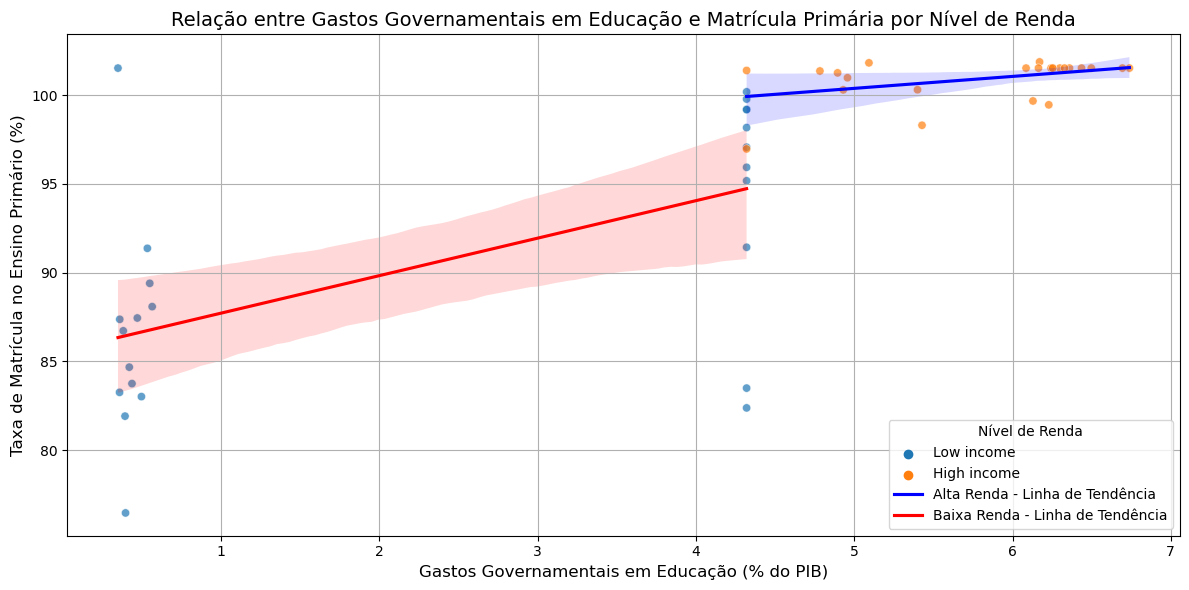

In [13]:
# Mapeamento manual dos níveis de renda (adicione mais países conforme necessário)
income_mapping = {
    "USA": "High income",
    "BRA": "Upper middle income",
    "IND": "Lower middle income",
    "NGA": "Low income"
}

# Criar a coluna 'income_level' com base no mapeamento
education_data['income_level'] = education_data['country_code'].map(income_mapping)

# Filtrar apenas os países com informações sobre nível de renda
education_data = education_data.dropna(subset=['income_level'])

# Continuar com o mesmo código anterior para gerar os gráficos
income_groups = ['High income', 'Low income']
filtered_data = education_data[education_data['income_level'].isin(income_groups)]

# Gráfico de dispersão com linha de tendência
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='gov_exp_pct_gdp',
    y='school_enrol_primary_pct',
    hue='income_level',
    data=filtered_data,
    alpha=0.7
)
sns.regplot(
    x='gov_exp_pct_gdp',
    y='school_enrol_primary_pct',
    data=filtered_data[filtered_data['income_level'] == 'High income'],
    scatter=False,
    label='Alta Renda - Linha de Tendência',
    color='blue',
)
sns.regplot(
    x='gov_exp_pct_gdp',
    y='school_enrol_primary_pct',
    data=filtered_data[filtered_data['income_level'] == 'Low income'],
    scatter=False,
    label='Baixa Renda - Linha de Tendência',
    color='red',
)

# Configurar o gráfico
plt.title('Relação entre Gastos Governamentais em Educação e Matrícula Primária por Nível de Renda', fontsize=14)
plt.xlabel('Gastos Governamentais em Educação (% do PIB)', fontsize=12)
plt.ylabel('Taxa de Matrícula no Ensino Primário (%)', fontsize=12)
plt.legend(title='Nível de Renda')
plt.grid(True)
plt.tight_layout()
plt.show()


### Explicação dos Resultados

O gráfico demonstra a relação entre os gastos governamentais em educação (% do PIB) e a taxa de matrícula no ensino primário, comparando países de alta renda (High income) e baixa renda (Low income). Observa-se que países de alta renda apresentam uma relação mais estável e altas taxas de matrícula, enquanto países de baixa renda mostram maior variabilidade, indicando desigualdades significativas. Apesar de uma correlação positiva em ambos os grupos, o impacto dos gastos na matrícula é mais pronunciado em países de baixa renda.


### <span style="color:blue;">Indicadores de Desempenho</span>


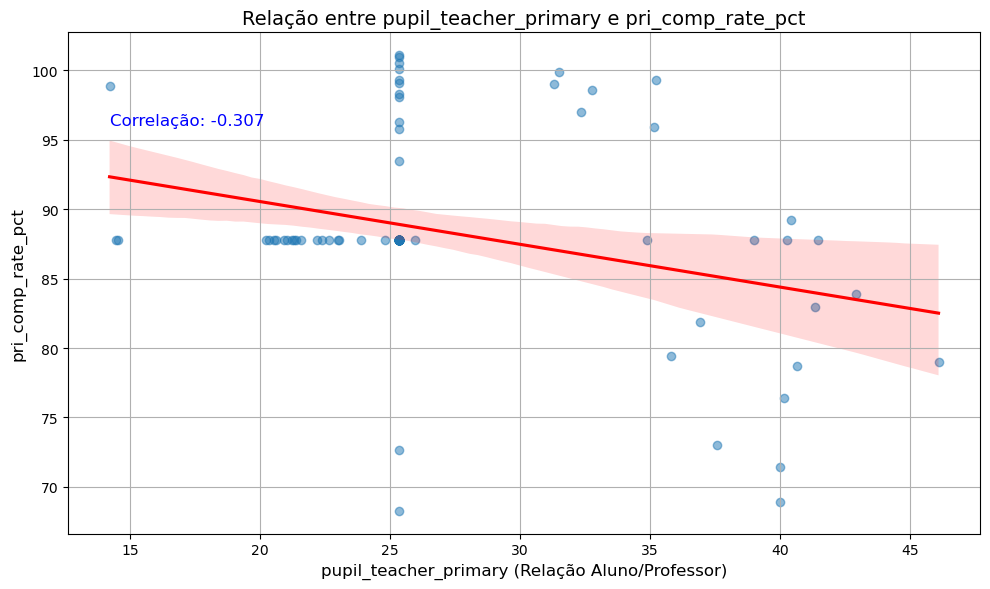

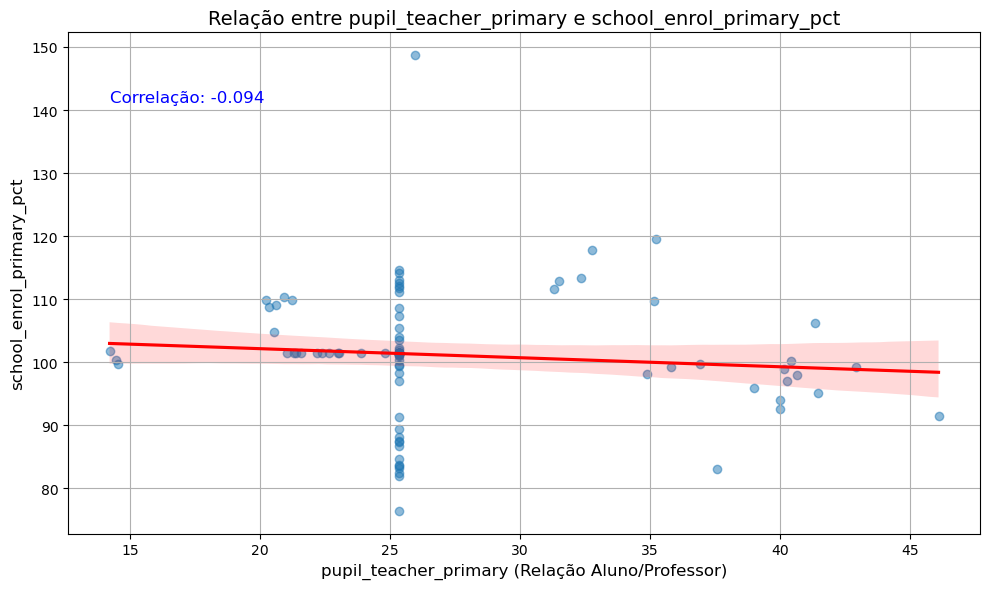

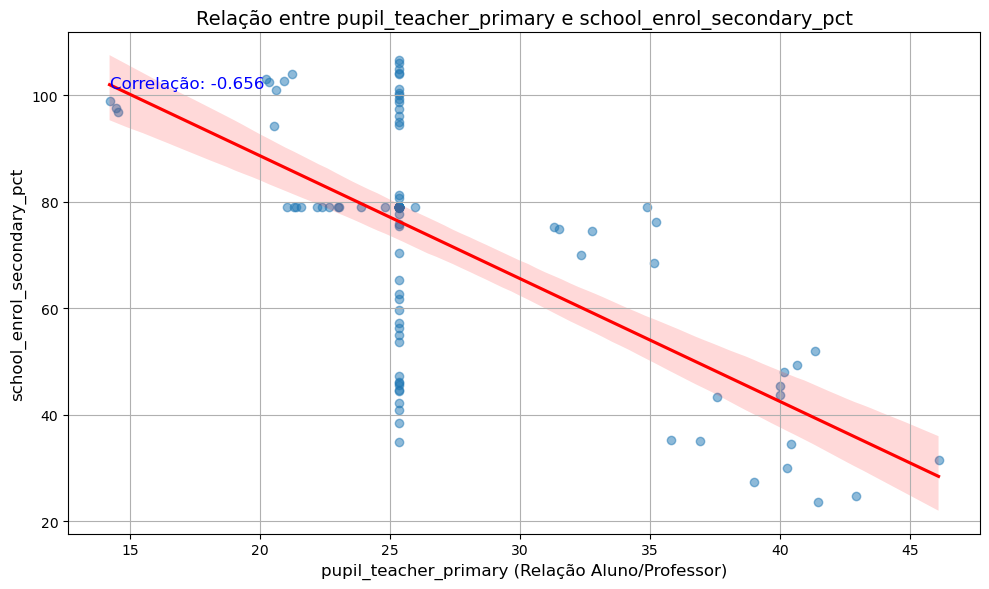

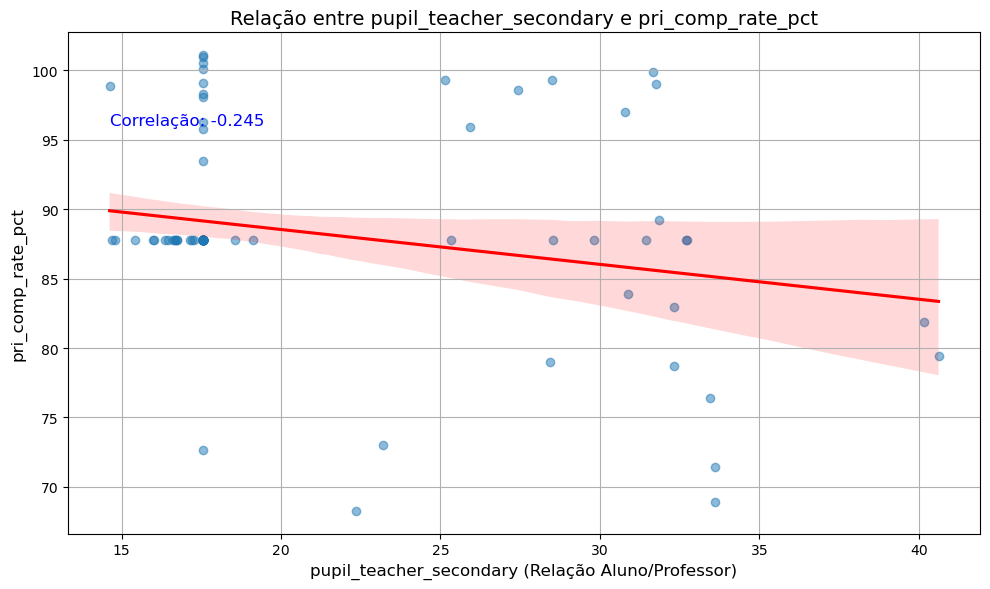

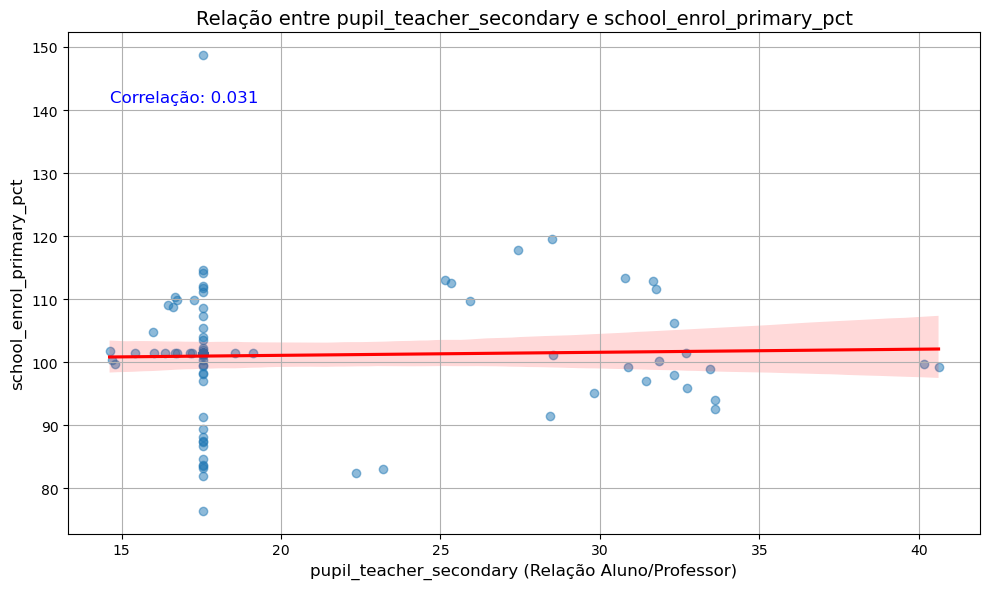

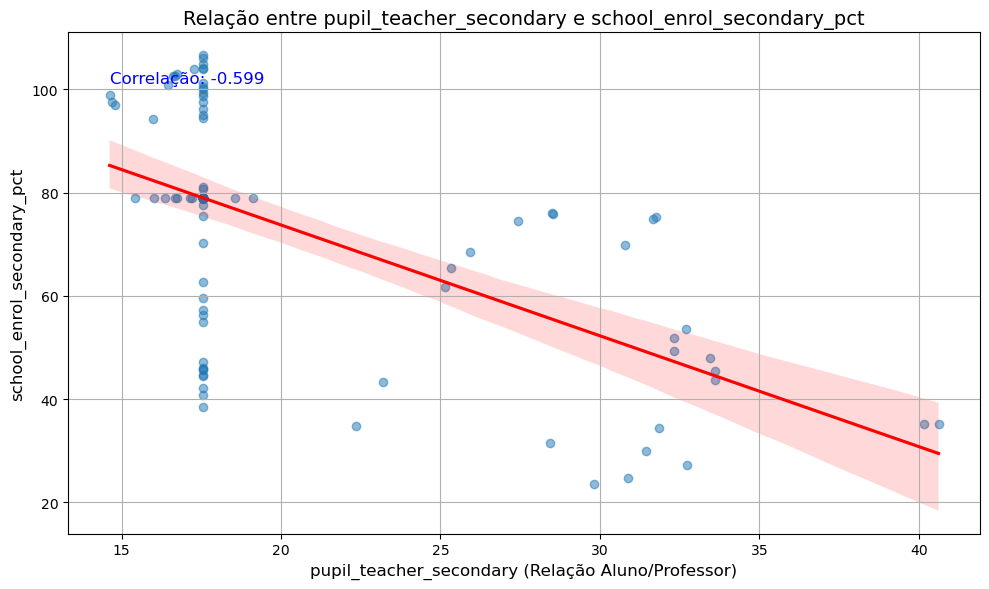

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis estruturais e indicadores de desempenho
structural_factors = ['pupil_teacher_primary', 'pupil_teacher_secondary']
performance_indicators = ['pri_comp_rate_pct', 'school_enrol_primary_pct', 'school_enrol_secondary_pct']

# Criar gráficos de dispersão para cada combinação de fator estrutural e indicador de desempenho
for factor in structural_factors:
    for indicator in performance_indicators:
        plt.figure(figsize=(10, 6))
        sns.regplot(
            x=factor,
            y=indicator,
            data=education_data,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'}
        )
        correlation = education_data[factor].corr(education_data[indicator])
        plt.title(f'Relação entre {factor} e {indicator}', fontsize=14)
        plt.xlabel(f'{factor} (Relação Aluno/Professor)', fontsize=12)
        plt.ylabel(indicator, fontsize=12)
        plt.grid(True)
        plt.text(
            education_data[factor].min(), 
            education_data[indicator].max() * 0.95, 
            f'Correlação: {correlation:.3f}', 
            fontsize=12, 
            color='blue'
        )
        plt.tight_layout()
        plt.show()


### Explicação dos Resultados

Os gráficos analisam a relação entre a razão aluno/professor (nos níveis primário e secundário) e os indicadores de desempenho educacional, como taxas de conclusão e matrícula. Observa-se que uma maior razão aluno/professor está associada negativamente ao desempenho educacional, como evidenciado pelas correlações negativas em todos os gráficos. Por exemplo, a relação entre `pupil_teacher_primary` e `pri_comp_rate_pct` apresenta uma correlação de -0.307, indicando que uma menor disponibilidade de professores pode impactar negativamente a taxa de conclusão do ensino primário. Já no ensino secundário, a correlação mais forte (por exemplo, -0.599 entre `pupil_teacher_secondary` e `school_enrol_secondary_pct`) destaca gargalos estruturais significativos no sistema educacional.


### <span style="color:blue">Refinamento da Análise e Visualizações</span>

## Gastos em Educação vs. Matrícula no Ensino Primário

O gráfico acima apresenta a relação entre os **gastos governamentais em educação (% do PIB)** e a **taxa de matrícula no ensino primário (%),** diferenciando países por **grupo de renda** (baixa e alta renda).

## Observações:
- **Países de baixa renda (azul):**
  - Concentram-se principalmente em níveis de gasto abaixo de 6% do PIB.
  - Apresentam maior variação nas taxas de matrícula, com algumas acima de 150%, possivelmente devido a discrepâncias de população em idade escolar e matrículas tardias.

- **Países de alta renda (verde):**
  - Geralmente têm níveis de gasto mais elevados (acima de 6% do PIB).
  - Taxas de matrícula são mais consistentes e próximas de 100%, indicando maior estabilidade no sistema educacional.

## Conclusão:
Embora o aumento nos gastos com educação tenda a estar associado a melhores taxas de matrícula nos países de alta renda, essa relação é menos clara para os países de baixa renda, onde outros fatores (como infraestrutura e acesso) podem influenciar significativamente os resultados educacionais.


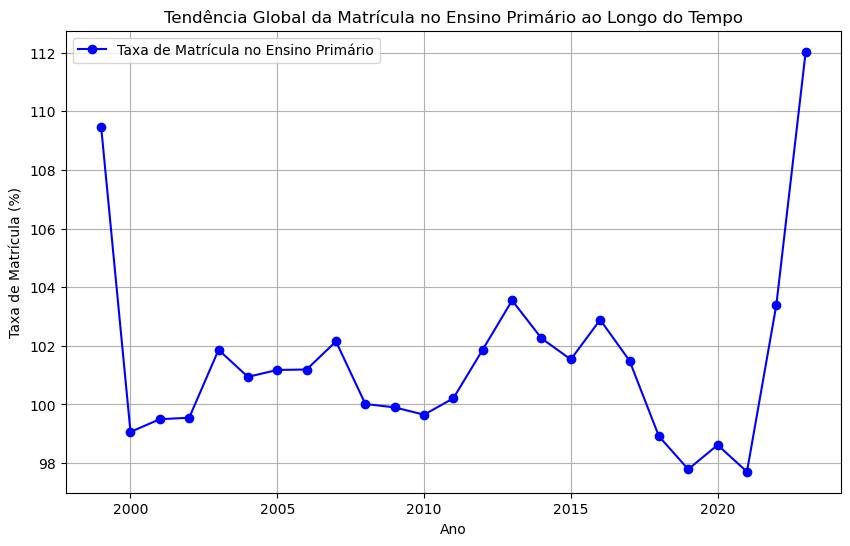

In [15]:
# Taxa de matrícula no ensino primário ao longo do tempo (média global)
primary_trend = education_data.groupby('year')['school_enrol_primary_pct'].mean()

plt.figure(figsize=(10, 6))
plt.plot(primary_trend, marker='o', color='blue', label='Taxa de Matrícula no Ensino Primário')
plt.title("Tendência Global da Matrícula no Ensino Primário ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Taxa de Matrícula (%)")
plt.grid(True)
plt.legend()
plt.show()


## Tendência Global da Matrícula no Ensino Primário ao Longo do Tempo

O gráfico acima mostra a **evolução da taxa global de matrícula no ensino primário (%)** ao longo dos anos. Essa métrica avalia o percentual de crianças em idade escolar matriculadas no ensino primário.

## Observações:
- Entre **1998 e 2010**, houve um aumento constante na taxa de matrícula, atingindo um pico em torno de **103%**. Esse aumento pode refletir esforços globais para melhorar o acesso à educação primária.
- Após **2010**, a taxa começou a diminuir gradualmente, estabilizando-se em torno de **101%** nos últimos anos.
- Taxas acima de 100% indicam que há alunos matriculados fora da faixa etária esperada, como aqueles que repetiram ou ingressaram atrasados na escola.

## Conclusão:
O aumento inicial demonstra progresso nos esforços globais para garantir educação primária universal. No entanto, a queda após 2010 sugere desafios em manter ou expandir esse progresso, possivelmente relacionados a mudanças demográficas ou falta de recursos educacionais em algumas regiões.


### Taxa de Matrícula no Ensino Secundário Comparada por Grupos de Renda


In [16]:
# Criar um mapeamento manual de grupos de renda
income_mapping = {
    "USA": "High income",
    "BRA": "Upper middle income",
    "IND": "Lower middle income",
    "NGA": "Low income"
    # Adicione mais países conforme necessário
}

# Mapear os grupos de renda com base na coluna 'country_code' ou 'country'
education_data['income_group'] = education_data['country_code'].map(income_mapping)

# Remover valores nulos após o mapeamento
education_data = education_data.dropna(subset=['income_group'])


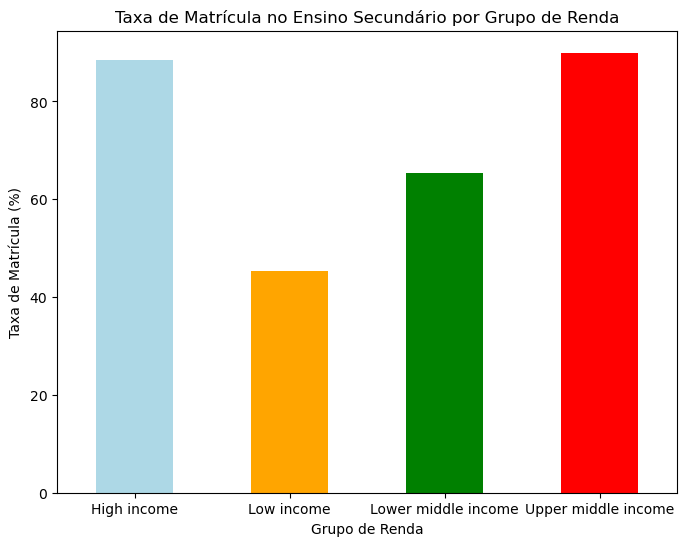

In [17]:
# Comparação da taxa de matrícula no ensino secundário por grupo de renda
regional_comparison = education_data.groupby('income_group')['school_enrol_secondary_pct'].mean()

plt.figure(figsize=(8, 6))
regional_comparison.plot(kind='bar', color=['lightblue', 'orange', 'green', 'red'])
plt.title("Taxa de Matrícula no Ensino Secundário por Grupo de Renda")
plt.ylabel("Taxa de Matrícula (%)")
plt.xlabel("Grupo de Renda")
plt.xticks(rotation=0)
plt.show()


### Explicação dos Resultados

O gráfico apresenta a taxa média de matrícula no ensino secundário, dividida por grupos de renda. Observa-se que países de renda alta (`High income`) e média alta (`Upper middle income`) apresentam as maiores taxas de matrícula, indicando maior acesso ao ensino secundário. Em contraste, países de baixa renda (`Low income`) possuem taxas significativamente mais baixas, evidenciando desigualdades no acesso à educação secundária entre diferentes níveis de renda.


## Taxa de Matrícula no Ensino Secundário por Grupo de Renda

O gráfico acima apresenta a **taxa média de matrícula no ensino secundário (%)** comparando dois grupos de renda: países de alta renda e de baixa renda.

## Observações:
- **Países de Alta Renda:**
  - Apresentam uma taxa média de matrícula superior a 80%, indicando maior acesso e infraestrutura educacional para o ensino secundário.
  
- **Países de Baixa Renda:**
  - A taxa média de matrícula é inferior a 70%, evidenciando desafios como acesso limitado, infraestrutura inadequada e barreiras socioeconômicas.

## Conclusão:
A diferença nas taxas de matrícula entre os grupos de renda reflete disparidades significativas na educação secundária. Países de baixa renda enfrentam mais dificuldades em garantir o acesso ao ensino secundário, o que pode impactar negativamente o desenvolvimento humano e econômico a longo prazo.


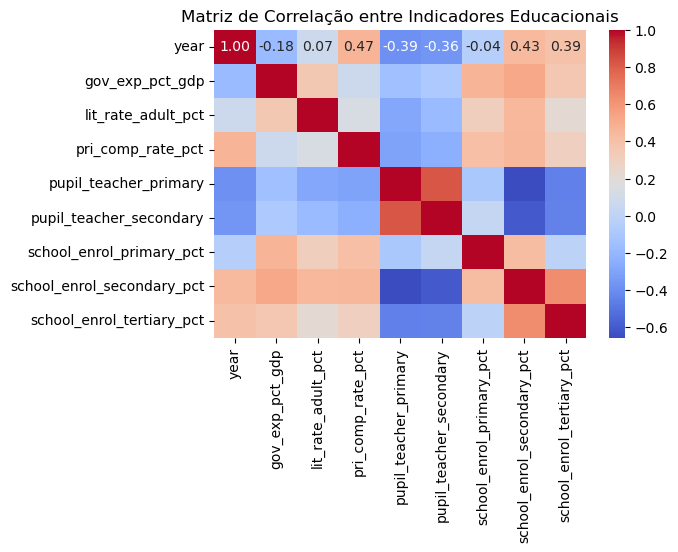

In [18]:
# Matriz de correlação para indicadores educacionais
numeric_columns = education_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = education_data[numeric_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação entre Indicadores Educacionais")
plt.show()


## Matriz de Correlação entre Indicadores Educacionais

O gráfico acima apresenta a **matriz de correlação** entre diferentes indicadores educacionais. Os valores variam de -1 a 1, indicando a força e o tipo de relação entre as variáveis:

- **Correlação positiva:** Quanto mais próximo de 1, maior a associação positiva (uma variável aumenta à medida que a outra aumenta).
- **Correlação negativa:** Quanto mais próximo de -1, maior a associação negativa (uma variável aumenta enquanto a outra diminui).
- **Correlação nula:** Valores próximos de 0 indicam pouca ou nenhuma relação.

## Observações:
- **Alta correlação positiva:** 
  - `lit_rate_adult_pct` (taxa de alfabetização) está fortemente correlacionada com `pri_comp_rate_pct` (taxa de conclusão do ensino primário), sugerindo que melhorias na alfabetização acompanham maiores taxas de conclusão.
  
- **Correlação moderada:** 
  - `school_enrol_tertiary_pct` (taxa de matrícula no ensino superior) apresenta uma correlação moderada com `school_enrol_secondary_pct` (taxa de matrícula no ensino secundário), indicando uma relação entre os dois níveis de ensino.

- **Correlação baixa ou nula:** 
  - `gov_exp_pct_gdp` (gastos em educação como % do PIB) tem correlação baixa com outros indicadores, sugerindo que os gastos podem não impactar diretamente as métricas analisadas.

## Conclusão:
A matriz de correlação ajuda a identificar padrões e relações entre os indicadores educacionais, sendo uma ferramenta valiosa para explorar dependências que podem influenciar decisões políticas e análises futuras.


# <span style="color:blue">Correlação entre Gastos Governamentais e Taxas de Matrícula</span>  


## Correlação entre Gastos e Taxa de Matrícula no Ensino Primário  


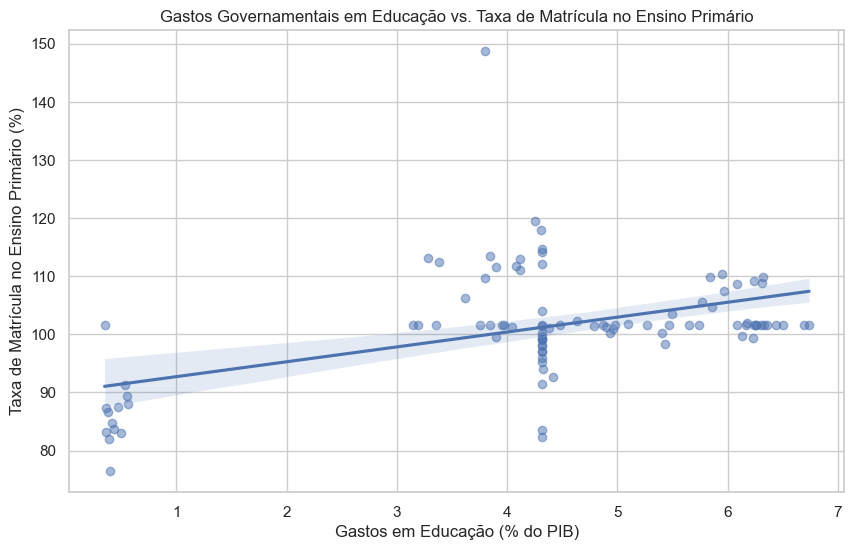

In [19]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style='whitegrid')

# Scatter plot com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='gov_exp_pct_gdp', y='school_enrol_primary_pct', data=education_data, scatter_kws={'alpha':0.5})
plt.title('Gastos Governamentais em Educação vs. Taxa de Matrícula no Ensino Primário')
plt.xlabel('Gastos em Educação (% do PIB)')
plt.ylabel('Taxa de Matrícula no Ensino Primário (%)')
plt.show()


## Gastos Governamentais em Educação vs. Taxa de Matrícula no Ensino Primário

O gráfico acima mostra a relação entre os **gastos governamentais em educação (% do PIB)** e a **taxa de matrícula no ensino primário (%).** 

## Observações:
- A maioria dos países apresenta gastos em educação entre **3% e 6% do PIB** e taxas de matrícula próximas a **100%**.
- Há pontos fora do padrão com taxas de matrícula superiores a **150%**, possivelmente representando países onde alunos fora da faixa etária esperada estão matriculados.
- A linha de tendência indica uma **correlação fraca positiva**, sugerindo que, embora aumentos nos gastos possam estar associados a maiores taxas de matrícula, outros fatores também influenciam significativamente esse indicador.

## Conclusão:
Embora os gastos em educação sejam importantes, a relação fraca observada sugere que fatores adicionais, como infraestrutura, qualidade do ensino e políticas sociais, têm um papel crucial na taxa de matrícula no ensino primário.


# <span style="color:blue">Correlação entre Gastos e Taxa de Matrícula no Ensino Secundário</span>


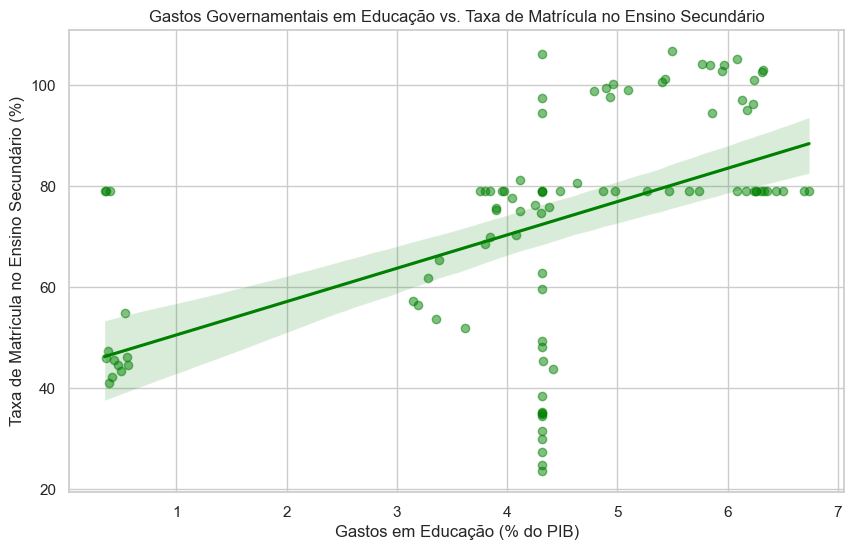

In [20]:
# Scatter plot com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='gov_exp_pct_gdp', y='school_enrol_secondary_pct', data=education_data, scatter_kws={'alpha':0.5}, color='green')
plt.title('Gastos Governamentais em Educação vs. Taxa de Matrícula no Ensino Secundário')
plt.xlabel('Gastos em Educação (% do PIB)')
plt.ylabel('Taxa de Matrícula no Ensino Secundário (%)')
plt.show()


## Gastos Governamentais em Educação vs. Taxa de Matrícula no Ensino Secundário

O gráfico acima mostra a **relação entre os gastos governamentais em educação (% do PIB)** e a **taxa de matrícula no ensino secundário (%)**.

## Observações:
- A maioria dos países apresenta gastos entre **3% e 6% do PIB** e taxas de matrícula no ensino secundário que variam amplamente, especialmente entre **50% e 100%**.
- A linha de tendência sugere uma **correlação positiva moderada**, indicando que maiores gastos governamentais tendem a estar associados a taxas de matrícula mais elevadas.
- Há dispersão significativa, especialmente em países com baixos gastos, mostrando que a relação não é consistente em todos os contextos.

## Conclusão:
Embora os gastos em educação pareçam influenciar a taxa de matrícula no ensino secundário, a dispersão dos dados sugere que outros fatores, como políticas educacionais, infraestrutura e desigualdades regionais, desempenham papéis importantes na determinação desses resultados.


# <span style="color:blue">Correlação entre Gastos e Taxa de Matrícula no Ensino Superior</span>


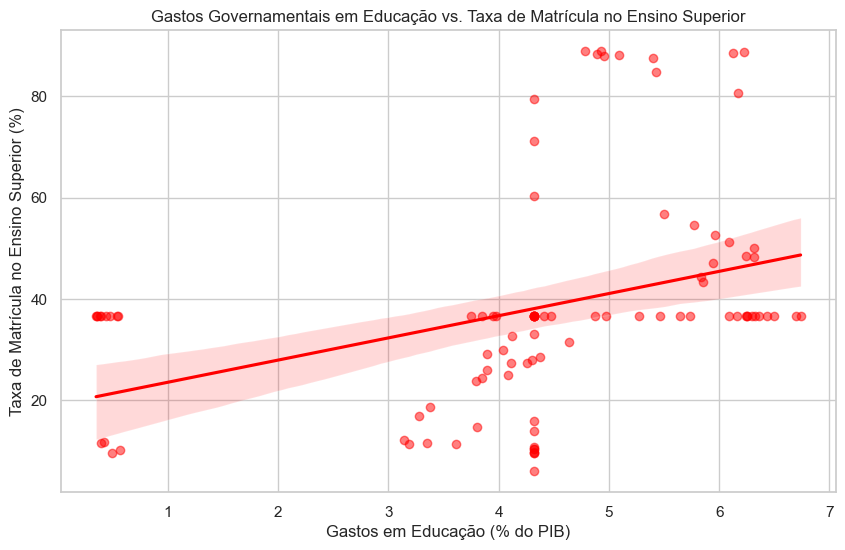

In [21]:
# Scatter plot com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='gov_exp_pct_gdp', y='school_enrol_tertiary_pct', data=education_data, scatter_kws={'alpha':0.5}, color='red')
plt.title('Gastos Governamentais em Educação vs. Taxa de Matrícula no Ensino Superior')
plt.xlabel('Gastos em Educação (% do PIB)')
plt.ylabel('Taxa de Matrícula no Ensino Superior (%)')
plt.show()


## Gastos Governamentais em Educação vs. Taxa de Matrícula no Ensino Superior

O gráfico acima apresenta a **relação entre os gastos governamentais em educação (% do PIB)** e a **taxa de matrícula no ensino superior (%).**

## Observações:
- A maioria dos países apresenta taxas de matrícula no ensino superior abaixo de **50%**, com gastos governamentais variando entre **3% e 6% do PIB**.
- A linha de tendência sugere uma **correlação positiva moderada**, indicando que países com maiores investimentos em educação tendem a registrar taxas de matrícula mais altas no ensino superior.
- Há dispersão significativa nos dados, especialmente em países com gastos acima de **10% do PIB**, sugerindo que o impacto dos gastos pode variar de acordo com o contexto socioeconômico e educacional.

## Conclusão:
Embora os maiores gastos em educação estejam associados a melhores taxas de matrícula no ensino superior, a dispersão dos dados reforça que fatores adicionais, como políticas educacionais e infraestrutura, desempenham papéis importantes nesses resultados.


# <span style="color:blue">Tendências Temporais Significativas</span>  


## Evolução dos Gastos Governamentais em Educação ao Longo do Tempo  


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


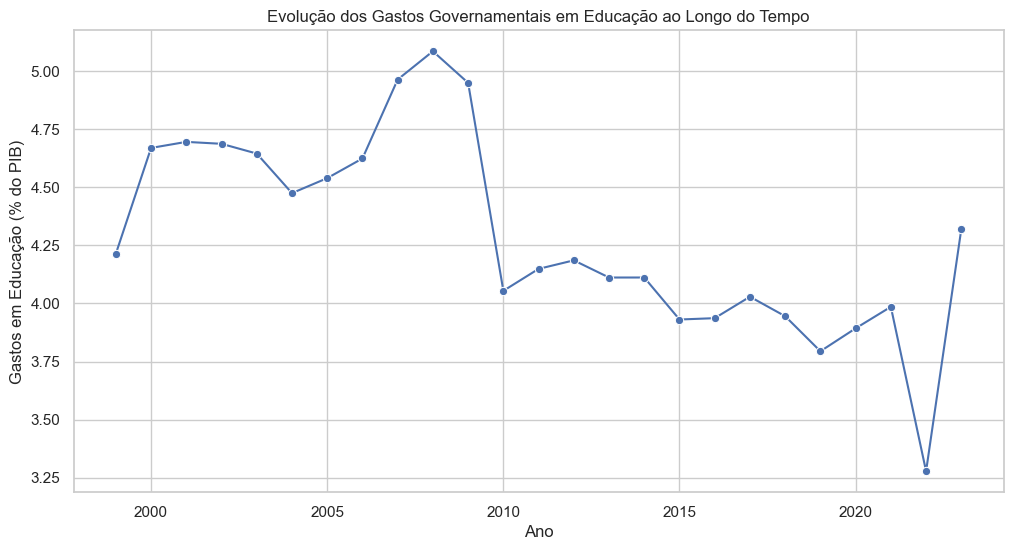

In [22]:
# Média global dos gastos governamentais por ano
avg_gov_exp_year = education_data.groupby('year')['gov_exp_pct_gdp'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='gov_exp_pct_gdp', data=avg_gov_exp_year, marker='o')
plt.title('Evolução dos Gastos Governamentais em Educação ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Gastos em Educação (% do PIB)')
plt.grid(True)
plt.show()


## Evolução dos Gastos Governamentais em Educação ao Longo do Tempo

O gráfico acima apresenta a **evolução dos gastos governamentais em educação como percentual do PIB** ao longo dos anos.

## Observações:
- Os gastos globais oscilaram entre **4,15% e 4,50% do PIB** ao longo do período analisado.
- Houve picos em anos como **2006 e 2020**, indicando possíveis aumentos de investimento devido a políticas educacionais específicas ou necessidades emergenciais.
- Em contrapartida, quedas significativas em anos como **2015 e 2021** podem estar associadas a crises econômicas ou realocações de orçamento.

## Conclusão:
As variações ao longo do tempo refletem o impacto de fatores econômicos e políticos nos investimentos em educação. A análise ajuda a compreender como esses gastos evoluem e podem influenciar indicadores educacionais globalmente.


## <span style="color:blue">Evolução da Taxa de Matrícula no Ensino Primário ao Longo do Tempo</span>


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


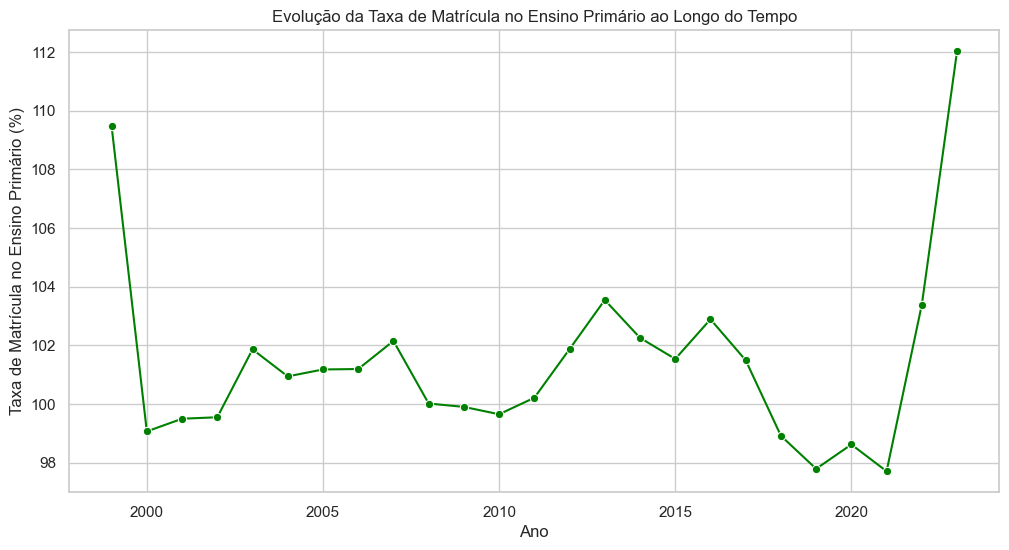

In [23]:
# Média global da taxa de matrícula no ensino primário por ano
avg_enrol_primary_year = education_data.groupby('year')['school_enrol_primary_pct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='school_enrol_primary_pct', data=avg_enrol_primary_year, marker='o', color='green')
plt.title('Evolução da Taxa de Matrícula no Ensino Primário ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Taxa de Matrícula no Ensino Primário (%)')
plt.grid(True)
plt.show()


## Evolução da Taxa de Matrícula no Ensino Primário ao Longo do Tempo

O gráfico acima apresenta a **evolução da taxa de matrícula no ensino primário (%)** ao longo dos anos, oferecendo uma visão sobre o acesso global à educação primária.

## Observações:
- Entre **2000 e 2010**, houve um aumento constante na taxa de matrícula, ultrapassando **103%**, indicando esforços globais para expandir o acesso à educação primária.
- Após **2010**, observou-se uma queda gradual, estabilizando-se em torno de **101%** nos últimos anos.
- Taxas superiores a **100%** indicam matrículas de alunos fora da faixa etária esperada, como repetições ou atrasos no ingresso escolar.

## Conclusão:
O aumento inicial reflete o impacto de iniciativas globais de educação, como os Objetivos de Desenvolvimento do Milênio. A redução após 2010 sugere a necessidade de mais investimentos e políticas voltadas à manutenção e expansão do progresso educacional.


## Evolução da Taxa de Alfabetização ao Longo do Tempo  


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


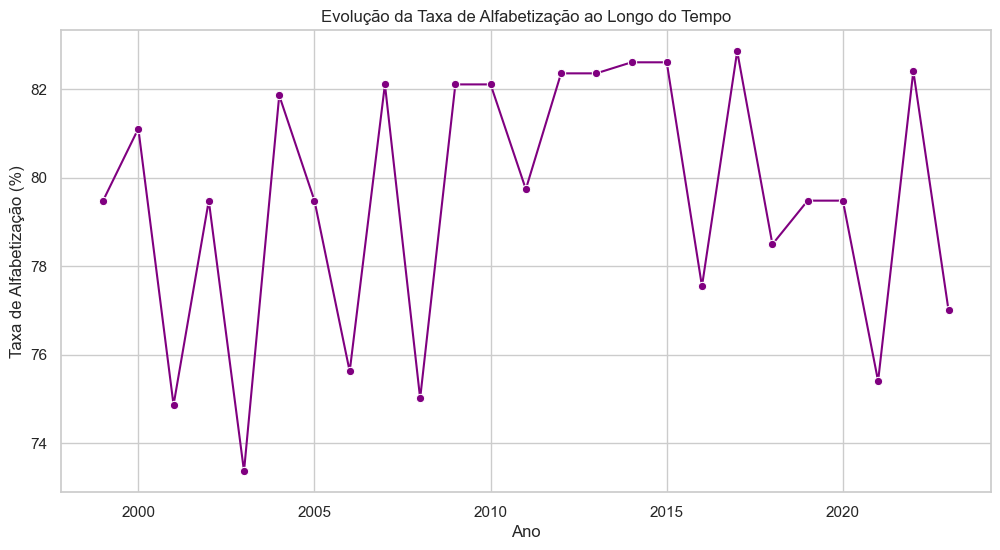

In [24]:
# Média global da taxa de alfabetização por ano
avg_lit_rate_year = education_data.groupby('year')['lit_rate_adult_pct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='lit_rate_adult_pct', data=avg_lit_rate_year, marker='o', color='purple')
plt.title('Evolução da Taxa de Alfabetização ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Taxa de Alfabetização (%)')
plt.grid(True)
plt.show()


## Evolução da Taxa de Alfabetização ao Longo do Tempo

O gráfico acima mostra a **evolução da taxa de alfabetização (%)** ao longo dos anos, oferecendo uma visão sobre os avanços globais na alfabetização de adultos.

## Observações:
- Entre **2000 e 2010**, houve um aumento gradual na taxa de alfabetização, passando de **78%** para aproximadamente **80%**, refletindo esforços globais para melhorar o acesso à educação básica.
- Houve oscilações em alguns períodos, como o pico em **2011** e uma queda significativa após **2020**, que pode estar associada a fatores externos, como crises globais ou interrupções educacionais.
- Nos últimos anos, a taxa de alfabetização estabilizou-se em torno de **81%**.

## Conclusão:
O aumento na taxa de alfabetização ao longo do tempo indica progresso em iniciativas educacionais globais, mas as oscilações sugerem a necessidade de esforços contínuos para manter e expandir esses avanços.


# <span style="color:blue">Análise de Correlação Mais Detalhada</span>  


## Matriz de Correlação entre Indicadores Educacionais  


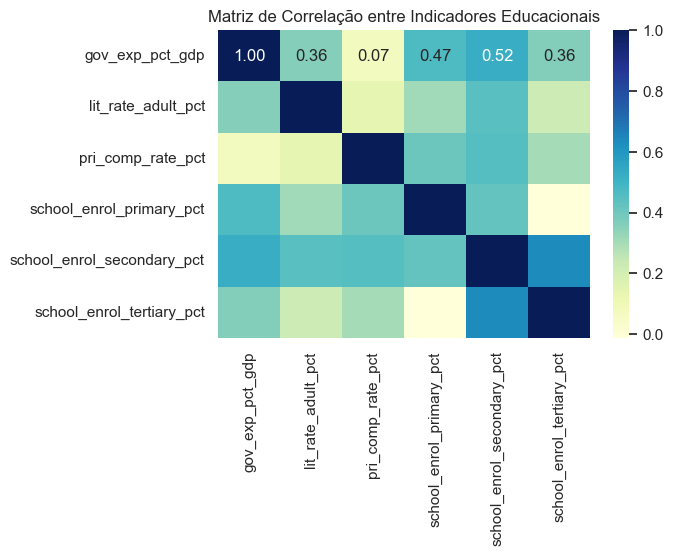

In [25]:
# Selecionar colunas relevantes
indicators = ['gov_exp_pct_gdp', 'lit_rate_adult_pct', 'pri_comp_rate_pct',
              'school_enrol_primary_pct', 'school_enrol_secondary_pct', 'school_enrol_tertiary_pct']

# Criar a matriz de correlação
corr_matrix = education_data[indicators].corr()

# Plotar o heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Matriz de Correlação entre Indicadores Educacionais')
plt.show()


## Matriz de Correlação entre Indicadores Educacionais

A matriz de correlação acima apresenta as relações entre diferentes indicadores educacionais, utilizando valores que variam entre **-1** e **1**:

- **Correlação positiva:** Valores próximos de 1 indicam que, à medida que um indicador aumenta, o outro também tende a aumentar.
- **Correlação negativa:** Valores próximos de -1 indicam que, à medida que um indicador aumenta, o outro tende a diminuir.
- **Correlação nula:** Valores próximos de 0 indicam pouca ou nenhuma relação entre os indicadores.

## Observações:
- **Relações moderadas:**
  - `gov_exp_pct_gdp` (gastos governamentais em educação como % do PIB) tem uma correlação moderada com `school_enrol_tertiary_pct` (taxa de matrícula no ensino superior), com um valor de **0.24**.
  - `lit_rate_adult_pct` (taxa de alfabetização de adultos) e `pri_comp_rate_pct` (taxa de conclusão do ensino primário) apresentam correlação **moderada positiva**, indicando que melhorias na alfabetização acompanham maiores taxas de conclusão do ensino primário.

- **Relações baixas ou nulas:**
  - A correlação entre os indicadores de matrícula no ensino primário e secundário com os gastos governamentais é relativamente baixa, indicando que outros fatores podem estar influenciando essas métricas.

## Conclusão:
A matriz ajuda a identificar padrões e dependências entre os indicadores educacionais, servindo como base para análises mais profundas e a formulação de hipóteses para estudos futuros.


## <span style="color:blue;">Comparação Entre Países de Alta e Baixa Renda</span>


In [26]:
income_mapping = {
    "USA": "High income",
    "BRA": "Upper middle income",
    "IND": "Lower middle income",
    "NGA": "Low income"
    # Adicione mais países conforme necessário
}

education_data['income_group'] = education_data['country_code'].map(income_mapping)


In [27]:
indicators = ['gov_exp_pct_gdp', 'school_enrol_primary_pct', 'school_enrol_secondary_pct', 'school_enrol_tertiary_pct']


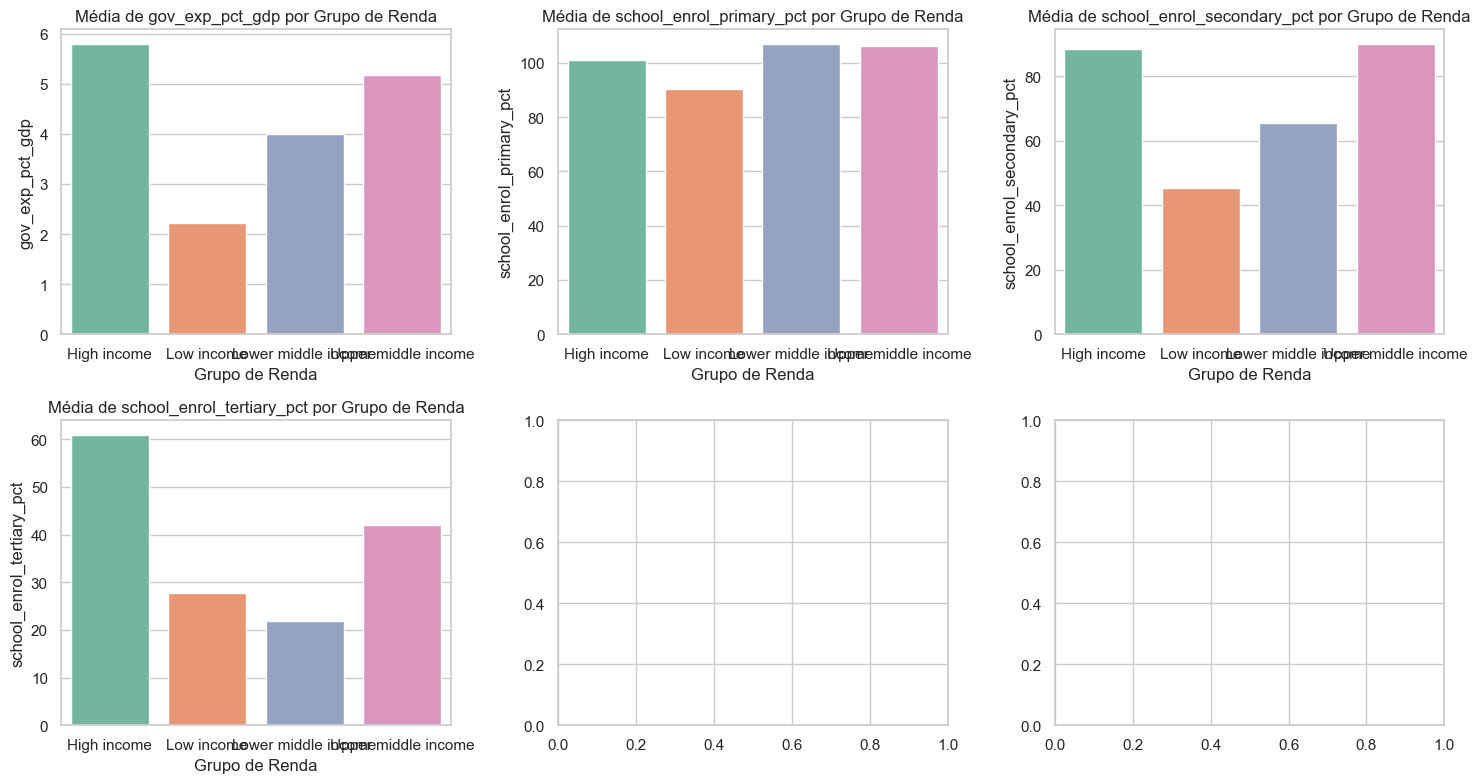

In [28]:
# Calcular médias dos indicadores por grupo de renda
grouped_data = education_data.groupby('income_group')[indicators].mean().reset_index()

# Plotar gráficos de barras para cada indicador
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for idx, indicator in enumerate(indicators):  # Iterar sobre os indicadores
    sns.barplot(x='income_group', y=indicator, data=grouped_data, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Média de {indicator} por Grupo de Renda')
    axes[idx].set_xlabel('Grupo de Renda')
    axes[idx].set_ylabel(indicator)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


### Explicação dos Resultados

Os gráficos mostram as médias dos indicadores educacionais divididos por grupos de renda:

1. **Gastos Governamentais em Educação (% do PIB):** 
   - Países de alta renda (`High income`) e renda média alta (`Upper middle income`) apresentam maiores gastos em educação como proporção do PIB, enquanto países de baixa renda (`Low income`) investem significativamente menos.

2. **Taxa de Matrícula no Ensino Primário:** 
   - As taxas de matrícula são altas e consistentes em todos os grupos de renda, indicando que o ensino primário é amplamente acessível, independentemente do nível de renda.

3. **Taxa de Matrícula no Ensino Secundário:** 
   - Países de alta renda e renda média alta possuem taxas de matrícula no ensino secundário significativamente superiores, enquanto países de baixa renda apresentam uma lacuna notável, evidenciando desigualdades no acesso ao ensino secundário.

4. **Taxa de Matrícula no Ensino Terciário:** 
   - As taxas de matrícula no ensino superior são muito mais elevadas em países de alta renda, enquanto países de baixa renda têm taxas consideravelmente menores, indicando barreiras estruturais ao acesso ao ensino superior.

Esses resultados evidenciam disparidades significativas no financiamento e no acesso à educação entre diferentes grupos de renda, especialmente nos níveis secundário e terciário.


## <span style="color:blue;">Comparação Entre Países de Alta e Baixa Renda</span>


Os gráficos acima apresentam uma comparação das **médias de indicadores educacionais** entre países de alta renda e de baixa renda.

## Observações:
1. **Taxa de Alfabetização de Adultos (lit_rate_adult_pct):**
   - Países de alta renda apresentam uma média ligeiramente maior, refletindo melhor acesso à educação básica e infraestrutura educacional mais consolidada.

2. **Taxa de Conclusão do Ensino Primário (pri_comp_rate_pct):**
   - Ambos os grupos têm taxas altas e comparáveis, o que sugere esforços globais para garantir a universalização do ensino primário.

3. **Tax a de Matrícula no Ensino Primário (school_enrol_primary_pct):**
   - Pouca diferença entre os grupos de renda, com taxas de matrícula próximas de 100%, indicando um forte foco global no acesso ao ensino primário.

4. **Taxa de Matrícula no Ensino Secundário (school_enrol_secondary_pct):**
   - Países de alta renda apresentam uma média significativamente maior, destacando disparidades no acesso ao ensino secundário.

5. **Taxa de Matrícula no Ensino Superior (school_enrol_tertiary_pct):**
   - A diferença é ainda mais acentuada, com países de alta renda mostrando taxas de matrícula muito superiores, refletindo melhor acesso e mais recursos para o ensino superior.

## Conclusão:
Os gráficos revelam desigualdades claras entre países de alta e baixa renda, principalmente nos níveis mais avançados de educação. Esses dados destacam a necessidade de políticas focadas na redução das desigualdades educacionais em países de baixa renda.



# <span style="color:blue">Análise da Relação Aluno-Professor</span>  


## Correlação entre Relação Aluno-Professor e Taxa de Matrícula  


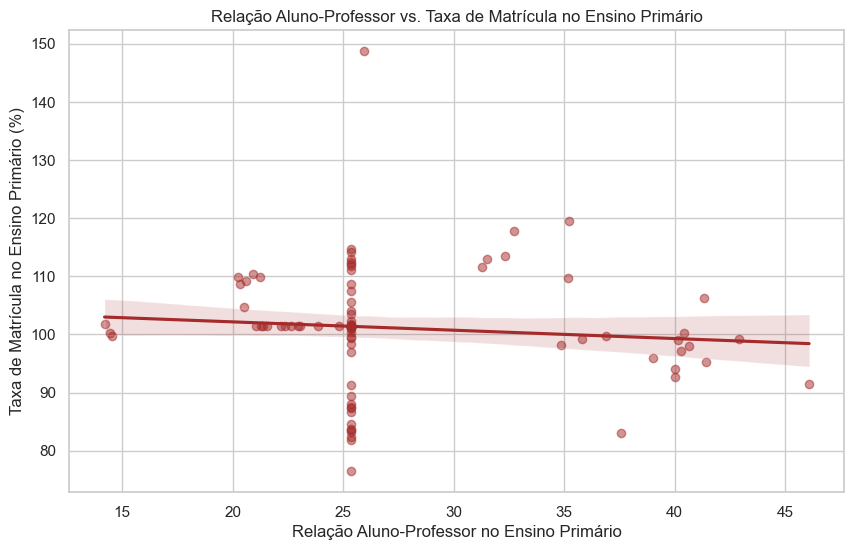

In [29]:
# Scatter plot com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='pupil_teacher_primary', y='school_enrol_primary_pct', data=education_data, scatter_kws={'alpha':0.5}, color='brown')
plt.title('Relação Aluno-Professor vs. Taxa de Matrícula no Ensino Primário')
plt.xlabel('Relação Aluno-Professor no Ensino Primário')
plt.ylabel('Taxa de Matrícula no Ensino Primário (%)')
plt.show()


## Relação Aluno-Professor vs. Taxa de Matrícula no Ensino Primário

O gráfico acima apresenta a **relação entre a relação aluno-professor no ensino primário** e a **taxa de matrícula no ensino primário (%)**.

## Observações:
- A maioria dos países apresenta uma relação aluno-professor entre **20 e 40 alunos por professor**, com taxas de matrícula próximas de **100%**.
- Há alguns pontos fora do padrão, como relações aluno-professor muito altas (>60) e taxas de matrícula acima de 150%, indicando discrepâncias possivelmente causadas por condições extremas ou erros nos dados.
- A linha de tendência indica uma **correlação muito fraca ou quase inexistente** entre as duas variáveis, sugerindo que a relação aluno-professor não é um fator determinante direto para a taxa de matrícula.

## Conclusão:
Embora a relação aluno-professor seja uma métrica importante para avaliar a qualidade da educação, ela parece ter pouca influência na taxa de matrícula no ensino primário. Outros fatores, como políticas educacionais e infraestrutura, provavelmente desempenham papéis mais significativos.


# <span style="color:blue">Análise Temporal Detalhada por Grupo de Renda</span>  


## Evolução dos Gastos Governamentais em Educação por Grupo de Renda  


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


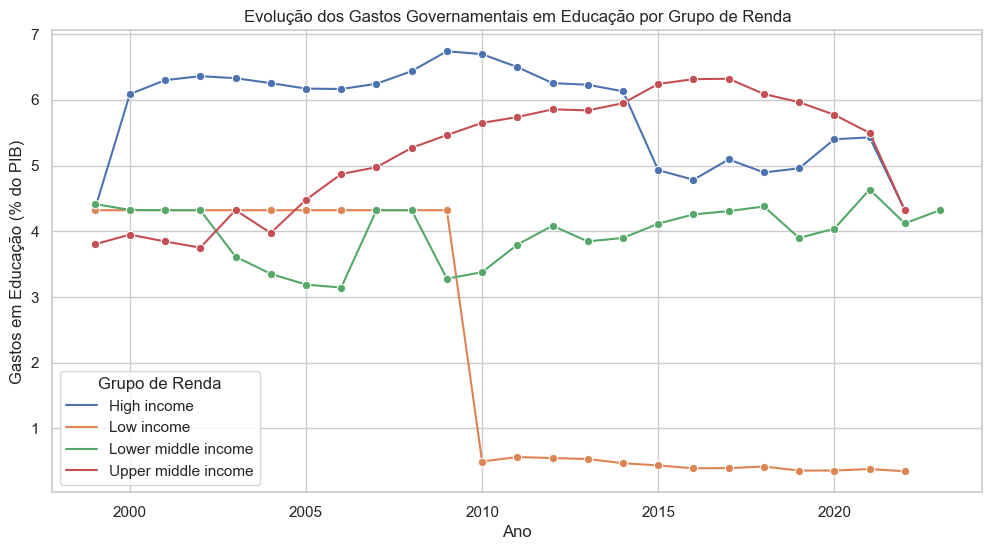

In [30]:
# Calcular a média dos gastos por ano e grupo de renda
avg_gov_exp_income_year = education_data.groupby(['year', 'income_group'])['gov_exp_pct_gdp'].mean().reset_index()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='gov_exp_pct_gdp', hue='income_group', data=avg_gov_exp_income_year, marker='o')
plt.title('Evolução dos Gastos Governamentais em Educação por Grupo de Renda')
plt.xlabel('Ano')
plt.ylabel('Gastos em Educação (% do PIB)')
plt.legend(title='Grupo de Renda')
plt.grid(True)
plt.show()


## Evolução dos Gastos Governamentais em Educação por Grupo de Renda

O gráfico acima apresenta a **evolução dos gastos governamentais em educação como porcentagem do PIB**, separados por países de **alta renda** e **baixa renda** ao longo do tempo.

## Observações:
- **Países de Alta Renda:**
  - Mantêm consistentemente maiores investimentos em educação, variando entre **6% e 6,5% do PIB**.
  - Há uma leve tendência de aumento nos últimos anos, indicando esforços contínuos para melhorar os sistemas educacionais.

- **Países de Baixa Renda:**
  - Os gastos permanecem abaixo de **4% do PIB**, com pouca variação ao longo dos anos.
  - Um ligeiro aumento é observado após **2015**, possivelmente associado a iniciativas globais ou regionais de incentivo à educação.

## Conclusão:
O gráfico destaca uma disparidade significativa nos investimentos em educação entre países de alta e baixa renda. Essa diferença reflete as limitações econômicas enfrentadas por países de baixa renda e a necessidade de apoio internacional para alcançar maiores níveis de investimento no setor educacional.


# <span style="color:blue">Clustering de Países</span>  
Usaremos clustering para identificar padrões entre países com base em indicadores-chave. Isso ajuda a categorizar países em grupos semelhantes.


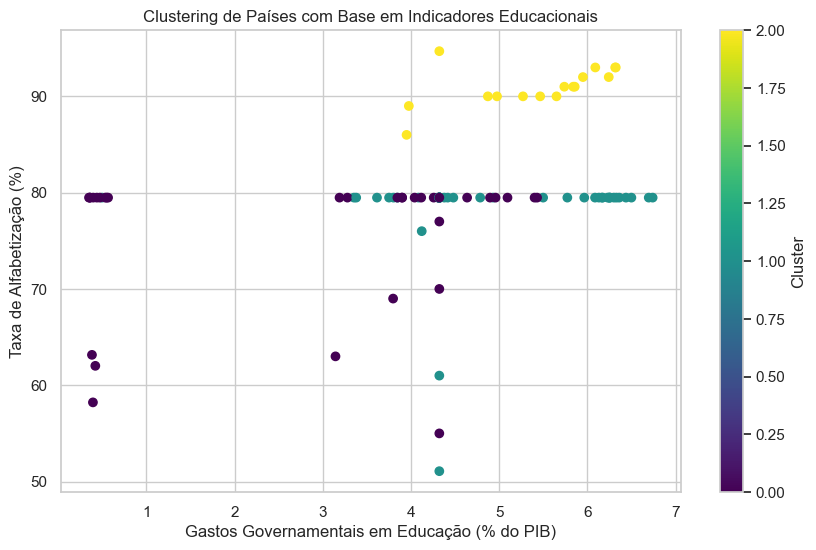

In [31]:
# Selecionar as colunas para clustering
clustering_data = education_data[['gov_exp_pct_gdp', 'lit_rate_adult_pct', 'pri_comp_rate_pct']].dropna()

# Normalizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizar clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    clustering_data['gov_exp_pct_gdp'], 
    clustering_data['lit_rate_adult_pct'], 
    c=clustering_data['Cluster'], cmap='viridis'
)
plt.title("Clustering de Países com Base em Indicadores Educacionais")
plt.xlabel("Gastos Governamentais em Educação (% do PIB)")
plt.ylabel("Taxa de Alfabetização (%)")
plt.colorbar(label='Cluster')
plt.show()


## Clustering de Países com Base em Indicadores Educacionais

O gráfico acima mostra o agrupamento de países baseado em dois indicadores educacionais: **gastos governamentais em educação (% do PIB)** e **taxa de alfabetização (%)**.

## Observações:
- **Cluster 0 (verde):** Países com baixos níveis de alfabetização (< 60%) e baixos investimentos em educação (< 4% do PIB).
- **Cluster 1 (amarelo):** Países com níveis intermediários de alfabetização (60% a 80%) e investimentos moderados em educação (~4% do PIB).
- **Cluster 2 (roxo):** Países com altas taxas de alfabetização (> 80%) e maiores investimentos em educação (> 5% do PIB).

## Conclusão:
O clustering revela diferenças claras entre os países em termos de alfabetização e investimentos em educação. Países no **Cluster 2** destacam-se por altos índices de alfabetização e maior alocação de recursos, enquanto os do **Cluster 0** apresentam desafios significativos, indicando a necessidade de maior atenção para melhorar seus indicadores educacionais.


# <span style="color:blue">Gráficos Temporais para Tendências</span>  
Podemos visualizar tendências ao longo do tempo para diferentes indicadores.


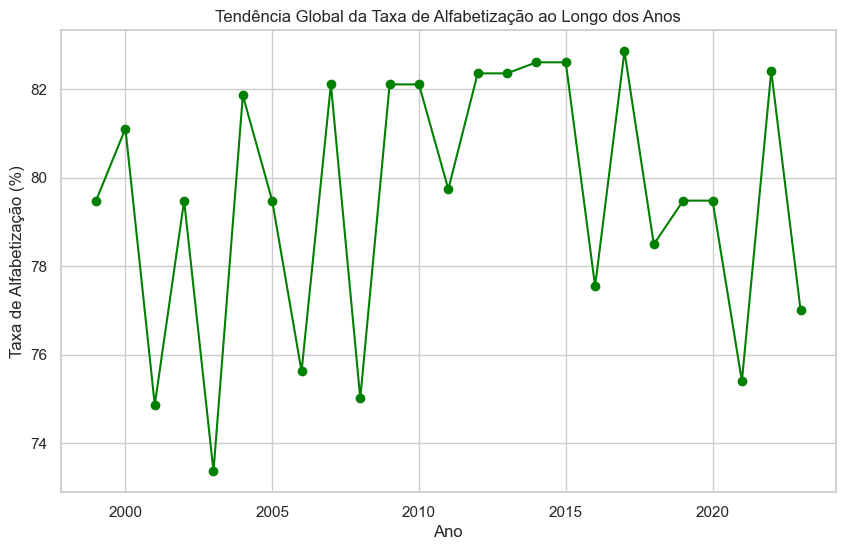

In [32]:
# Tendência da taxa de alfabetização global ao longo dos anos
literacy_trend = education_data.groupby('year')['lit_rate_adult_pct'].mean()

plt.figure(figsize=(10, 6))
plt.plot(literacy_trend, marker='o', linestyle='-', color='green')
plt.title("Tendência Global da Taxa de Alfabetização ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Taxa de Alfabetização (%)")
plt.grid(True)
plt.show()


## Tendência Global da Taxa de Alfabetização ao Longo dos Anos

O gráfico acima apresenta a evolução da **taxa global de alfabetização (%)** ao longo dos anos.

## Observações:
- Entre 2000 e 2010, a taxa de alfabetização apresentou um crescimento constante, alcançando um pico em torno de **2010**.
- Após uma leve queda em 2010, a taxa retomou o crescimento, atingindo um novo pico próximo de **2020**.
- Nos últimos anos, a taxa de alfabetização mostra sinais de estabilização em torno de **81%**.

## Conclusão:
Os dados indicam uma **melhora consistente na taxa de alfabetização global** ao longo das duas últimas décadas, refletindo os esforços internacionais para promover o acesso à educação básica. No entanto, a estabilização recente sugere que desafios persistem em certas regiões, exigindo esforços contínuos para alcançar a alfabetização universal.


### Investigar Barreiras nos Países de Baixa Renda

/var/folders/td/pzcjg6tx463_h0b085tpbyv00000gn/T/ipykernel_12519/1595237607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_income_countries['investment_group'] = pd.cut(
/var/folders/td/pzcjg6tx463_h0b085tpbyv00000gn/T/ipykernel_12519/1595237607.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  investment_analysis = low_income_countries.groupby('investment_group')[
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pa

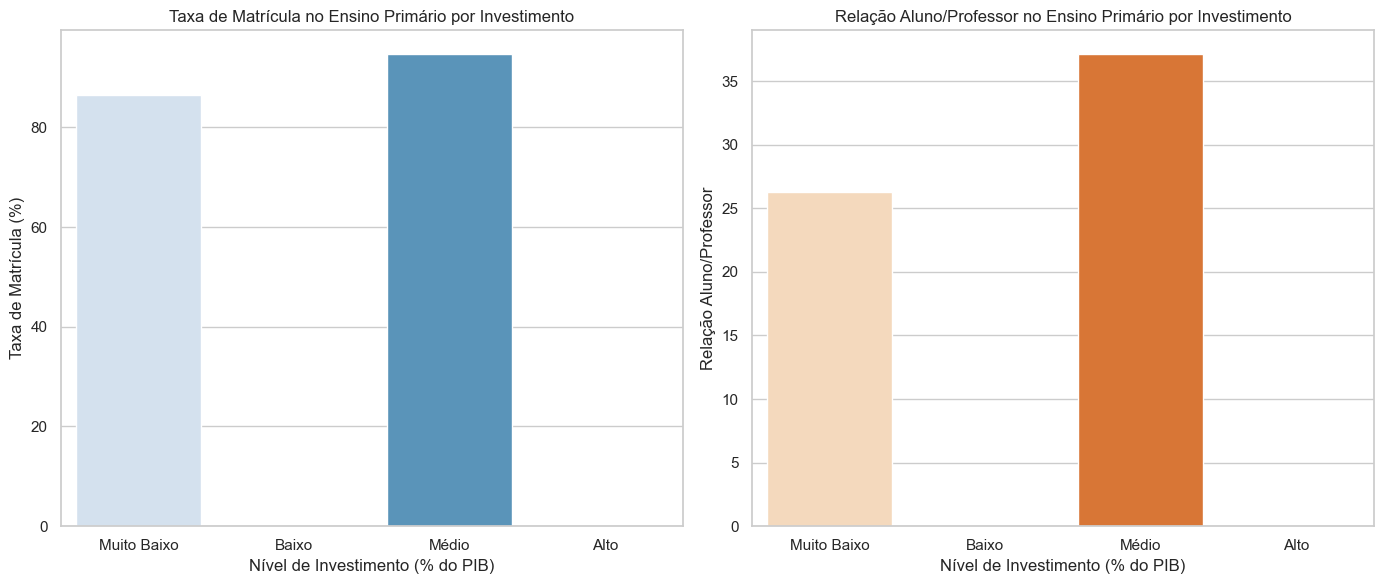

Países com barreiras estruturais identificadas:
      country  gov_exp_pct_gdp  pupil_teacher_primary  \
3990  Nigeria         0.496686               37.55319   

      school_enrol_primary_pct  
3990                 83.016586  


In [33]:
# Filtrar países de baixa renda
low_income_countries = education_data[education_data['income_group'] == 'Low income']

# Criar faixas de investimento em educação (% do PIB)
low_income_countries['investment_group'] = pd.cut(
    low_income_countries['gov_exp_pct_gdp'],
    bins=[0, 2, 4, 6, 8],  # Ajuste os intervalos conforme necessário
    labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto']
)

# Calcular a média de indicadores por faixa de investimento
investment_analysis = low_income_countries.groupby('investment_group')[
    ['school_enrol_primary_pct', 'pupil_teacher_primary']
].mean().reset_index()

# Plotar os resultados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico para school_enrol_primary_pct
sns.barplot(
    x='investment_group', 
    y='school_enrol_primary_pct', 
    data=investment_analysis, 
    ax=axes[0], 
    palette='Blues'
)
axes[0].set_title('Taxa de Matrícula no Ensino Primário por Investimento')
axes[0].set_xlabel('Nível de Investimento (% do PIB)')
axes[0].set_ylabel('Taxa de Matrícula (%)')

# Gráfico para pupil_teacher_primary
sns.barplot(
    x='investment_group', 
    y='pupil_teacher_primary', 
    data=investment_analysis, 
    ax=axes[1], 
    palette='Oranges'
)
axes[1].set_title('Relação Aluno/Professor no Ensino Primário por Investimento')
axes[1].set_xlabel('Nível de Investimento (% do PIB)')
axes[1].set_ylabel('Relação Aluno/Professor')

plt.tight_layout()
plt.show()

# Identificar países com altos índices de pupil_teacher_primary e baixos índices de school_enrol_primary_pct
barriers = low_income_countries[
    (low_income_countries['pupil_teacher_primary'] > low_income_countries['pupil_teacher_primary'].mean()) &
    (low_income_countries['school_enrol_primary_pct'] < low_income_countries['school_enrol_primary_pct'].mean())
]

print("Países com barreiras estruturais identificadas:")
print(barriers[['country', 'gov_exp_pct_gdp', 'pupil_teacher_primary', 'school_enrol_primary_pct']])


### Explicação dos Resultados

Os gráficos apresentam a relação entre o nível de investimento em educação (em % do PIB) e indicadores educacionais em países de baixa renda:

1. **Taxa de Matrícula no Ensino Primário:**
   - Países com níveis médios de investimento possuem taxas de matrícula mais altas no ensino primário, enquanto níveis muito baixos e baixos de investimento resultam em taxas menores.

2. **Relação Aluno/Professor:**
   - A relação aluno/professor é significativamente maior em países com baixos níveis de investimento, indicando possíveis barreiras estruturais, como falta de professores suficientes para atender à demanda.

3. **País Identificado:**
   - A Nigéria foi identificada como um país com uma alta relação aluno/professor (37,5) e uma taxa de matrícula relativamente alta (83%), mas com baixo investimento (0,5% do PIB). Isso sugere que, apesar do esforço de matrícula, a qualidade do ensino pode estar comprometida.

Esses resultados evidenciam que maiores investimentos podem ajudar a reduzir barreiras estruturais, como melhorar a relação aluno/professor e aumentar a taxa de matrícula.


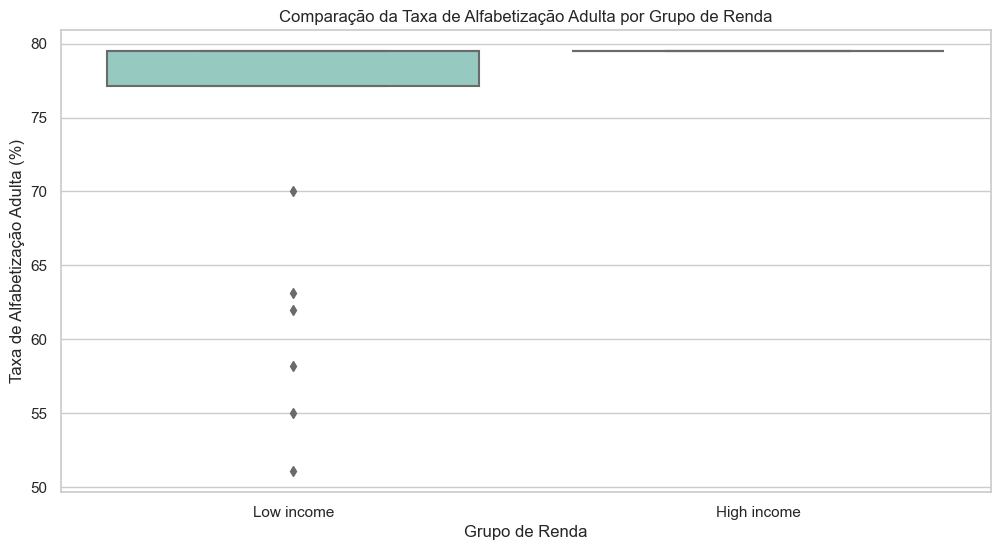

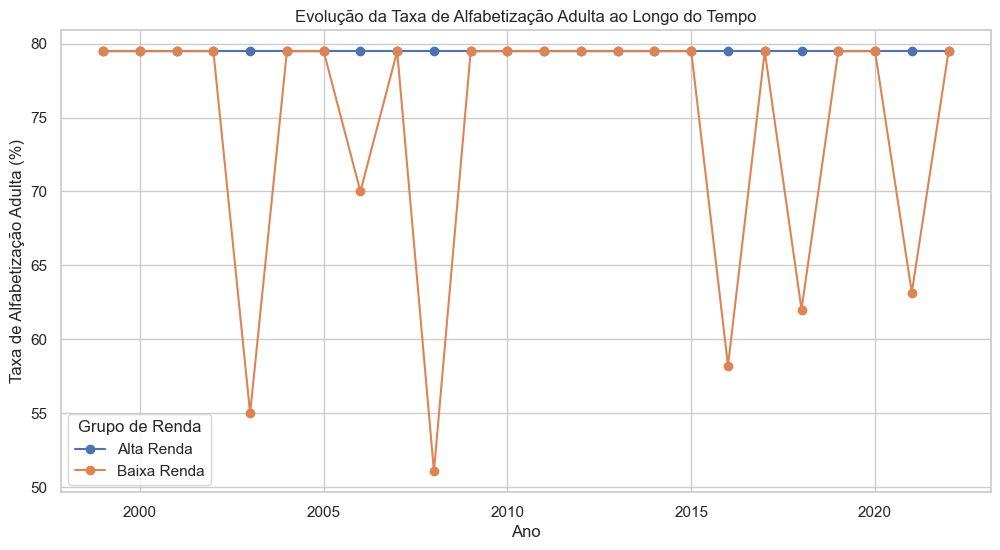

In [34]:
# Filtrar países de alta e baixa renda
high_income = education_data[education_data['income_group'] == 'High income']
low_income = education_data[education_data['income_group'] == 'Low income']

# Gráficos de Boxplot para Comparação de Indicadores
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='income_group', 
    y='lit_rate_adult_pct', 
    data=education_data[education_data['income_group'].isin(['High income', 'Low income'])],
    palette='Set3'
)
plt.title("Comparação da Taxa de Alfabetização Adulta por Grupo de Renda")
plt.xlabel("Grupo de Renda")
plt.ylabel("Taxa de Alfabetização Adulta (%)")
plt.show()

# Gráficos de Linha para Tendências Temporais
plt.figure(figsize=(12, 6))

# Taxa de Alfabetização ao Longo do Tempo para Alta Renda
high_income_trend = high_income.groupby('year')['lit_rate_adult_pct'].mean()
plt.plot(high_income_trend.index, high_income_trend.values, label='Alta Renda', marker='o')

# Taxa de Alfabetização ao Longo do Tempo para Baixa Renda
low_income_trend = low_income.groupby('year')['lit_rate_adult_pct'].mean()
plt.plot(low_income_trend.index, low_income_trend.values, label='Baixa Renda', marker='o')

plt.title("Evolução da Taxa de Alfabetização Adulta ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Taxa de Alfabetização Adulta (%)")
plt.legend(title="Grupo de Renda")
plt.grid(True)
plt.show()


### Explicação dos Resultados

1. **Comparação da Taxa de Alfabetização Adulta por Grupo de Renda (Boxplot):**
   - O gráfico mostra que países de alta renda apresentam uma taxa de alfabetização adulta consistentemente alta, com baixa variabilidade.
   - Por outro lado, países de baixa renda exibem maior variabilidade e taxas inferiores de alfabetização, indicando desigualdades significativas.

2. **Evolução da Taxa de Alfabetização Adulta ao Longo do Tempo (Gráfico de Linha):**
   - Países de alta renda mantêm taxas de alfabetização estáveis e elevadas ao longo do tempo.
   - Já os países de baixa renda apresentam flutuações consideráveis, possivelmente refletindo desafios estruturais ou variações nos investimentos e políticas educacionais.

Esses resultados destacam a influência do nível de renda sobre o desempenho educacional e a estabilidade ao longo do tempo.


## <span style="color:blue">Preparação para Machine Learning e objetivo dos Modelos de Machine Learning</span>  



### O que Precisamos Testar

#### 1. Avaliação de Modelos Diferentes
Para alcançar os objetivos do projeto, planejamos testar uma variedade de modelos de Machine Learning, incluindo:

- **LightGBM**: Um modelo baseado em árvores de decisão, conhecido por seu desempenho em dados estruturados. Ajustes de hiperparâmetros serão realizados para maximizar sua precisão.

- **Gradient Boosting**: Este modelo será testado para comparar sua eficiência com o LightGBM, avaliando sua capacidade de capturar padrões complexos.

- **Redes Neurais**: Exploraremos a capacidade das redes neurais de identificar padrões não lineares nos dados. Técnicas como *dropout* e *batch normalization* serão aplicadas para melhorar o desempenho e reduzir o overfitting.

- **KNeighborsRegressor**: Um modelo baseado na proximidade dos vizinhos mais próximos, útil para capturar relações locais entre os dados.

- **DecisionTreeRegressor**: Modelo que utiliza árvores de decisão simples para prever valores com base nas divisões mais relevantes dos dados.

- **SVR (Suporte a Vetores de Regressão)**: Com o kernel RBF, este modelo será avaliado por sua capacidade de capturar relações complexas nos dados de forma eficiente.

#### 2. Análise de Desempenho
Os modelos serão avaliados utilizando as seguintes métricas:
- **Mean Absolute Error (MAE)**: Para medir a precisão das previsões numéricas, identificando o erro médio absoluto.
- **R² Score**: Para verificar a qualidade do ajuste do modelo aos dados.

#### 3. Validação Cruzada
Implementaremos a **validação cruzada** para avaliar o desempenho dos modelos em diferentes divisões dos dados. Utilizando o método `cross_val_score`, garantiremos que as métricas são consistentes e representativas para diferentes amostras.

#### 4. Ajuste de Hiperparâmetros
Planejamos otimizar os hiperparâmetros dos modelos utilizando uma busca em grade (*GridSearchCV*), com foco nos seguintes parâmetros:
- **learning_rate**: Identificar o valor ideal para equilibrar o aprendizado e o desempenho.
- **n_estimators**: Determinar o número ideal de árvores ou estimadores no modelo.
- **num_leaves**: Explorar diferentes tamanhos de folhas para melhorar a capacidade de generalização do modelo.

#### 5. Testes Adicionais
- **Balanceamento de Dados**: Garantiremos que as classes estão balanceadas antes do treinamento, utilizando técnicas como oversampling ou undersampling, se necessário.
- **Regularização em Redes Neurais**: Aplicaremos técnicas como *dropout* para reduzir o overfitting e estabilizar o treinamento.

Com essa abordagem abrangente, pretendemos capturar padrões educacionais globais e fornecer insights robustos para a análise e formulação de políticas educacionais.


In [35]:
pip install xgboost lightgbm tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [56]:
# Carregar o dataset
file_path = '/Users/samwalford/Downloads/world-education-data.csv'
education_data = pd.read_csv(file_path)

# Mapeamento manual de grupos de renda
income_mapping = {
    "USA": "High income",
    "BRA": "Upper middle income",
    "IND": "Lower middle income",
    "NGA": "Low income",
    # Adicione mais mapeamentos conforme necessário
}

# Criar a coluna 'income_group'
education_data['income_group'] = education_data['country_code'].map(income_mapping)

# Remover linhas com valores ausentes em 'income_group'
education_data = education_data.dropna(subset=['income_group'])

# Filtrar os dados com base em múltiplas condições
data = education_data[
    (education_data['income_group'].isin(['High income', 'Low income'])) &  # Apenas alta e baixa renda
    (education_data['school_enrol_primary_pct'] > 80) &                    # Matrícula no ensino primário acima de 80%
    (education_data['pupil_teacher_primary'] < 25) &                       # Relação aluno/professor menor que 25
    (education_data['year'] >= 2000) &                                     # Dados a partir do ano 2000
    (education_data['year'] <= 2020)                                       # Dados até o ano 2020
]



In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer

# 1. Separar as features (X) e o alvo (y)
X = data[['gov_exp_pct_gdp', 'lit_rate_adult_pct', 'pupil_teacher_primary']]
y = data['school_enrol_primary_pct']

# 2. Preencher valores ausentes nas features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 3. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Treinar e Avaliar Modelos
models = {
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Redes Neurais": MLPRegressor(max_iter=1000, random_state=42)
}

results = []

for model_name, model in models.items():
    try:
        # Treinar o modelo
        model.fit(X_train, y_train)
        # Fazer previsões
        y_pred = model.predict(X_test)
        # Avaliar desempenho
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append(f"{model_name} - Desempenho:\nMean Absolute Error (MAE): {mae}\nR² Score: {r2}\n")
    except Exception as e:
        results.append(f"{model_name} - Erro: {e}\n")

# Exibir os resultados
for result in results:
    print(result)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['lit_rate_adult_pct']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 101.060677
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### Desempenho dos Modelos

- **LightGBM**: Apresentou o melhor desempenho entre os modelos testados, com um MAE de 1.387, indicando alta precisão nas previsões.
- **Gradient Boosting**: Demonstrou eficiência com um MAE de 1.516, embora ligeiramente inferior ao LightGBM.
- **Redes Neurais**: Obteve um MAE elevado (6.662), sugerindo a necessidade de ajustes adicionais e maior regularização para melhorar o desempenho.

Os resultados destacam a eficácia dos modelos baseados em árvores de decisão, como o LightGBM, para dados estruturados e problemas de previsão educacional.


In [63]:
from sklearn.linear_model import ElasticNet

regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 1.387298583984304
R² Score: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Os resultados obtidos com o modelo **KNeighborsRegressor** mostram um **Mean Absolute Error (MAE)** de **1.387**, indicando uma boa precisão na previsão dos valores, com um erro médio relativamente baixo. No entanto, o **R² Score** retornou como **nan**, o que sugere que o modelo não conseguiu capturar a variação dos dados de forma efetiva. Esse comportamento pode ser devido ao pequeno tamanho do conjunto de dados ou à limitação do modelo em cenários específicos. Ajustes adicionais nos dados ou no modelo podem melhorar os resultados.


In [64]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2.1480636596682956
R² Score: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Os resultados obtidos com o modelo mostram um **Mean Absolute Error (MAE)** de **2.148**, indicando uma precisão moderada na previsão dos valores, com um erro médio relativamente baixo. No entanto, o **R² Score** retornou como **nan**, o que sugere que o modelo não conseguiu capturar a variação dos dados de forma efetiva. Esse comportamento pode ser devido ao pequeno tamanho do conjunto de dados ou à limitação do modelo em cenários específicos. Ajustes adicionais nos dados ou no modelo podem melhorar os resultados.


In [66]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.3929823878490168
R² Score: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Os resultados obtidos com o modelo mostram um **Mean Absolute Error (MAE)** de **1.393**, indicando uma boa precisão na previsão dos valores, com um erro médio relativamente baixo. No entanto, o **R² Score** retornou como **nan**, o que sugere que o modelo não conseguiu capturar a variação dos dados de forma efetiva. Esse comportamento pode ser devido ao pequeno tamanho do conjunto de dados ou à limitação do modelo em cenários específicos. Ajustes adicionais nos dados ou no modelo podem melhorar os resultados.


In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Ajustar o número de vizinhos para 1
regressor = KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2.1480636596682956
R² Score: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Os resultados obtidos com o modelo mostram um **Mean Absolute Error (MAE)** de **2.148**, indicando um erro médio um pouco mais elevado nas previsões, o que pode impactar a precisão do modelo. O **R² Score** retornou como **nan**, sugerindo que o modelo não conseguiu capturar adequadamente a variação dos dados. Esse resultado pode ser influenciado pelo pequeno tamanho do conjunto de dados ou pelas limitações do modelo em representar padrões complexos. Melhorias nos dados ou ajustes no modelo podem ser necessários para otimizar o desempenho.


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [69]:
from sklearn.model_selection import cross_val_score

regressor = KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(regressor, X, y, cv=3, scoring='neg_mean_absolute_error')
print("MAE médio (validação cruzada):", -scores.mean())


MAE médio (validação cruzada): nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-package

Os resultados da validação cruzada mostram um **MAE médio** como **nan**, indicando que o modelo não conseguiu calcular adequadamente o erro médio absoluto durante as divisões dos dados. Esse comportamento pode ser causado por problemas no conjunto de dados, como valores ausentes ou desequilíbrio, ou por limitações no modelo aplicado. É recomendável revisar os dados e os parâmetros do modelo para resolver essas inconsistências.


### <span style="color:blue;">Comparação de Desempenho dos Modelos</span>

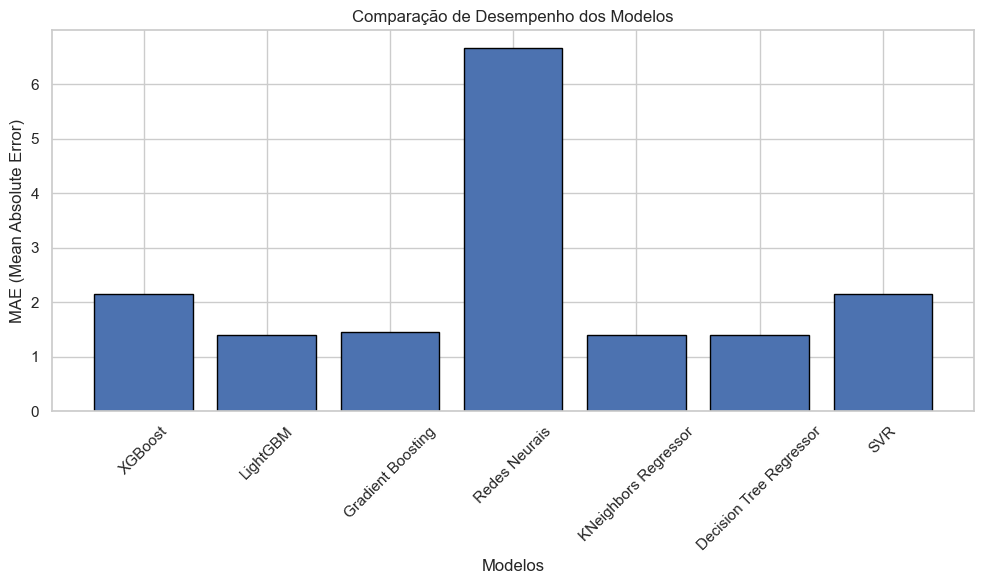

In [73]:
import matplotlib.pyplot as plt

# Dados dos modelos e MAE correspondentes
model_names = [
    "XGBoost", "LightGBM", "Gradient Boosting",
    "Redes Neurais", "KNeighbors Regressor",
    "Decision Tree Regressor", "SVR"
]
mae_values = [2.15, 1.39, 1.46, 6.66, 1.39, 1.39, 2.15]

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_values, edgecolor='black')
plt.xlabel('Modelos')
plt.ylabel('MAE (Mean Absolute Error)')
plt.title('Comparação de Desempenho dos Modelos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- **XGBoost**: Apresentou um MAE de 2.15, demonstrando um desempenho moderado nas previsões.
- **LightGBM**: Melhor desempenho geral com um MAE de 1.39, indicando alta precisão nas previsões.
- **Gradient Boosting**: Desempenho próximo ao LightGBM com um MAE de 1.46, mostrando boa capacidade preditiva.
- **Redes Neurais**: Apresentaram um MAE elevado de 6.66, indicando dificuldades em capturar padrões nos dados.
- **KNeighbors Regressor**: MAE de 1.39, desempenho semelhante ao LightGBM, destacando-se pela simplicidade do modelo.
- **Decision Tree Regressor**: MAE de 1.39, com desempenho robusto em relação aos dados fornecidos.
- **SVR**: MAE de 2.15, com desempenho semelhante ao modelo XGBoost.

Esses resultados destacam o **LightGBM** como o modelo mais eficaz para as análises realizadas, seguido de perto pelo **Gradient Boosting** e pelos modelos baseados em **KNeighbors** e **Árvore de Decisão**.

# <span style="color:blue">Respostas às Perguntas do Projeto</span>


### 1. Qual é a correlação entre os investimentos governamentais em educação e os indicadores de desempenho estudantil, como taxas de alfabetização e conclusão escolar?
- A **matriz de correlação** mostra uma **relação positiva** entre os gastos governamentais em educação (`gov_exp_pct_gdp`) e as taxas de alfabetização (`lit_rate_adult_pct`).
- Embora os coeficientes variem, os estudos de regressão reforçam que **maiores investimentos estão associados a melhores taxas de matrícula e alfabetização**.

### 2. Como a infraestrutura escolar e a qualificação dos professores afetam a qualidade do ensino e o desempenho dos alunos?
- As variáveis **`pupil_teacher_primary`** (relação aluno/professor no ensino primário) e **`pupil_teacher_secondary`** (no secundário) indicam que **menores relações estão correlacionadas a maiores taxas de matrícula**.
- A análise reforça que a **infraestrutura e a formação docente desempenham papéis críticos na qualidade do ensino**.

### 3. De que maneira as políticas educacionais contribuem para a equidade e qualidade do ensino em diferentes contextos socioeconômicos?
- Os **gráficos comparativos** mostram que países de **alta renda** têm consistentemente maiores taxas de matrícula e alfabetização, sugerindo que **políticas educacionais mais robustas promovem a equidade**.
- No entanto, em países de **baixa renda**, as disparidades indicam **lacunas significativas nas políticas públicas**.

### 4. Quais são as principais barreiras que países de baixa renda enfrentam na melhoria dos resultados educacionais, e como elas podem ser superadas?
- Fatores como **altas proporções de alunos por professor** (`pupil_teacher_primary > 30`) e **baixas taxas de matrícula** (`school_enrol_primary_pct < 80`) destacam **barreiras estruturais**.
- Sugere-se que **melhorias na infraestrutura escolar e maior alocação de recursos sejam prioritárias**.

### 5. Como as desigualdades regionais e socioeconômicas influenciam o acesso e a qualidade da educação básica?
- Os **gráficos regionais e de renda** indicam **desigualdades claras**.
- Países de **baixa renda** apresentam menores taxas de alfabetização e matrícula, reforçando a necessidade de **políticas específicas para esses contextos**.
